### Imports

In [ ]:
# Imports generales
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

# Modelos supervisados
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

# Modelo no supervisado
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import silhouette_score

from sklearn.metrics import roc_curve, roc_auc_score

import pickle 

import warnings
warnings.filterwarnings("ignore")

---

In [2]:
#!pip install catboost

In [3]:
# Lo tengo de prueba
df_full = pd.read_csv("../data/1_raw/studient.csv")

In [4]:
df = pd.read_csv("../data/2_processed/datos_limpios.csv")

In [5]:
df.head()

,Admission grade,Previous qualification (grade),Previous qualification,Mother's qualification,Father's qualification,Displaced,Marital status,Nacionality,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Tuition fees up to date,Target
0,127.3,122.0,1,19,12,1,1,1,0,0,0.000000,1,Dropout
1,142.5,160.0,1,1,3,1,1,1,6,6,14.000000,0,Graduate
2,124.8,122.0,1,37,37,1,1,1,6,0,0.000000,0,Dropout
3,119.6,122.0,1,38,37,1,1,1,6,6,13.428571,1,Graduate
4,141.5,100.0,1,37,38,0,2,1,6,5,12.333333,1,Graduate


In [6]:
# Dividimos en X e y
X = df.drop("Target", axis=1)
y = df["Target"]

In [7]:
# Separamon en X_train, X_test, y_train, y_test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (2904, 12)
Test shape: (726, 12)


In [ ]:
# Guardamos los datos con el split

X_train.to_csv("../data/3_train/X_train.csv", index=False)
y_train.to_csv("../data/3_train/y_train.csv", index=False)
X_test.to_csv("../data/4_test/X_test.csv", index=False)
y_test.to_csv("../data/4_test/y_test.csv", index=False)


In [9]:
X_train.head()

,Admission grade,Previous qualification (grade),Previous qualification,Mother's qualification,Father's qualification,Displaced,Marital status,Nacionality,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Tuition fees up to date
244,150.0,150.0,39,19,37,0,1,1,6,6,14.333333,1
799,134.1,135.0,1,34,34,1,2,1,5,0,0.000000,0
644,115.1,121.0,1,1,1,1,1,1,6,6,10.833333,1
371,123.0,135.0,1,37,37,1,1,1,8,7,13.381429,1
2361,157.8,110.0,12,34,34,0,2,1,8,8,13.750000,1


In [10]:
y_train.head()

244     Graduate
799      Dropout
644     Graduate
371     Graduate
2361    Graduate
Name: Target, dtype: object

---

## OBJETIVO DE NEGOCIO:

Reducir el índice de abandono de universitarios

Identificar a los alumnos que necesitan ayuda y sobretodo que no se nos pase ningún alumno que necesite apoyo escolar.

### Tener en cuenta el pequeño desbalanceo que hay entre clase

---

## BASELINE

In [11]:
svc_model = SVC()

svc_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
filename = "../models/otros/baseline.pkl"

modelo_base = svc_model.get_params

with open(filename, "wb") as archivo_salida:
    pickle.dump(modelo_base, archivo_salida)


Accuracy: 0.7382920110192838

Precision: 0.7737692946783855

Recall: 0.7382920110192838

F1-score: 0.7077069343051103

Reporte de la clasificación:
               precision    recall  f1-score   support

     Dropout       0.87      0.39      0.54       284
    Graduate       0.71      0.96      0.82       442

    accuracy                           0.74       726
   macro avg       0.79      0.68      0.68       726
weighted avg       0.77      0.74      0.71       726



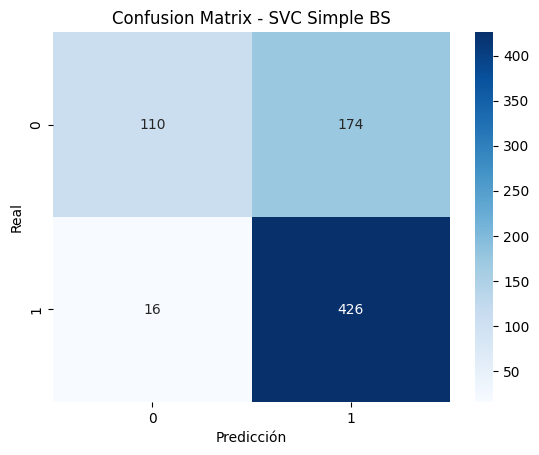

In [38]:
# Predicciones
y_pred = svc_model.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test, y_pred))

f1_baseline = f1_score(y_test, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - SVC Simple BS")
plt.show()

# Me interesa el precision/recall --> f1

# BASELINE
## F1-score: 0.7077069343051103


---

# PRIMERA VUELTA DE OPTIMIZACIÓN:

#### 5 modelos supervisados y 1 no supervisado

**Supervisado** 

- *Clasificador* --> LogisticRegression

- *Arboles* --> RandomForestClassifier, XGBoost, CatBoost

- *Suport Vector Clasifier* --> SVC

**No Supervisado**

- *Kmeans* --> No supervisado (Identificar estudiantiles)


---

# REGRESIÓN LOGISTICA 1

In [12]:
pipe_lr_bl = Pipeline([
    ('scaler', StandardScaler()),
    ('class', LogisticRegression(max_iter=500))
])

In [13]:
lr_params = {
    'scaler': [StandardScaler(), 'passthrough'],
    'class__C': [0.01, 0.1, 1, 10],
    'class__penalty': ['l2', None],
    'class__solver': ['lbfgs'] # Acepta el l2 y es el más rápido
}

In [14]:
grid_lr = GridSearchCV(pipe_lr_bl,
                              param_grid=lr_params,
                              cv=5,
                              scoring='f1',
                              verbose=1, 
                              n_jobs=-1)
grid_lr

,estimator,Pipeline(step...x_iter=500))])
,param_grid,"{'class__C': [0.01, 0.1, ...], 'class__penalty': ['l2', None], 'class__solver': ['lbfgs'], 'scaler': [StandardScaler(), 'passthrough']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [15]:
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,estimator,Pipeline(step...x_iter=500))])
,param_grid,"{'class__C': [0.01, 0.1, ...], 'class__penalty': ['l2', None], 'class__solver': ['lbfgs'], 'scaler': [StandardScaler(), 'passthrough']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


Mejores parámetros:
 {'class__C': 0.01, 'class__penalty': 'l2', 'class__solver': 'lbfgs', 'scaler': StandardScaler()}

Accuracy: 0.8360881542699724

Precision: 0.8445961844201597

Recall: 0.8360881542699724

F1-score: 0.8300296977046856

Reporte de la clasificación:
               precision    recall  f1-score   support

     Dropout       0.89      0.66      0.76       284
    Graduate       0.81      0.95      0.88       442

    accuracy                           0.84       726
   macro avg       0.85      0.80      0.82       726
weighted avg       0.84      0.84      0.83       726



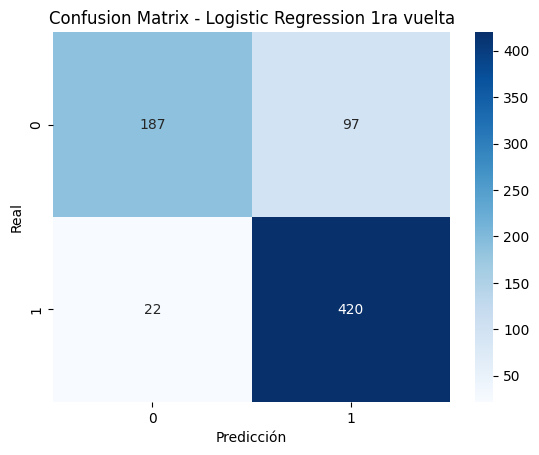

In [16]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", grid_lr.best_params_)

# Predicciones
y_pred = grid_lr.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test, y_pred))

f1_lr_1 = f1_score(y_test, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - Logistic Regression 1ra vuelta")
plt.show()

# Me interesa el precision/recall

---

# Random Forest 1

In [17]:
# Pipeline
pipe_rf = Pipeline([
    ("class", RandomForestClassifier())
])

In [18]:
# Parametros de Random Forest Classifier
param_grid_rf = {
    "class__n_estimators": [200, 400],
    "class__max_depth": [10, 20, None],
    "class__min_samples_split": [2, 5],
    "class__min_samples_leaf": [1, 2]
}

In [19]:
# Parametros
grid_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="f1",
    n_jobs=-1
)
grid_rf

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'class__max_depth': [10, 20, ...], 'class__min_samples_leaf': [1, 2], 'class__min_samples_split': [2, 5], 'class__n_estimators': [200, 400]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [20]:
grid_rf.fit(X_train, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'class__max_depth': [10, 20, ...], 'class__min_samples_leaf': [1, 2], 'class__min_samples_split': [2, 5], 'class__n_estimators': [200, 400]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


Mejores parámetros:
 {'class__max_depth': 10, 'class__min_samples_leaf': 1, 'class__min_samples_split': 2, 'class__n_estimators': 200}

Accuracy: 0.8801652892561983

Precision: 0.8845702711727171

Recall: 0.8801652892561983

F1-score: 0.8775228991160062

Reporte de la clasificación:
               precision    recall  f1-score   support

     Dropout       0.92      0.76      0.83       284
    Graduate       0.86      0.96      0.91       442

    accuracy                           0.88       726
   macro avg       0.89      0.86      0.87       726
weighted avg       0.88      0.88      0.88       726



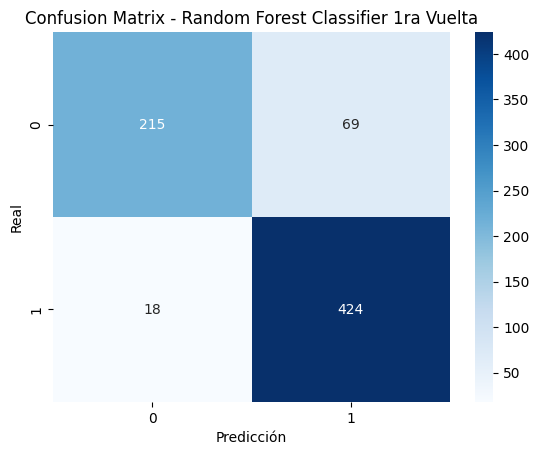

In [21]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", grid_rf.best_params_)

# Predicciones
y_pred = grid_rf.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test, y_pred))

f1_rf_1 = f1_score(y_test, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - Random Forest Classifier 1ra Vuelta")
plt.show()

# Me interesa el precision/recall

---

# XGBoost 1

In [26]:
# Codifico el Target para que XGBoost pueda interpretarlo:
le = LabelEncoder()
y_train_e = le.fit_transform(y_train)
y_test_e = le.transform(y_test)

In [ ]:
# Guardamos la y codificada para el split de XGBoost

pd.DataFrame({"y_train_encoded": y_train_e}).to_csv("../data/3_train/y_train_XGB.csv", index=False)
pd.DataFrame({"y_test_encoded": y_test_e}).to_csv("../data/4_test/y_test_XGB.csv", index=False)

In [24]:
pipe_xgb = Pipeline([
    ("class", XGBClassifier(
        tree_method="hist",
        # Divide los valores en bins (histogramas)
        # Calcula el mejor split a partir del histograma, no del valor exacto
        # También se puede usar 'exact', pero consuma más RAM, más lento y tiene el mismo resultado casi siempre.
        eval_metric="mlogloss", # Métrica recomendada para multiclase, es decir, mide qué tan buena es la probabilidad predicha para cada clase.
    ))
])

In [25]:
param_grid_xgb = {
    "class__n_estimators": [200, 400],
    "class__learning_rate": [0.01, 0.1],
    "class__max_depth": [4, 6, 8],
    "class__subsample": [0.8, 1.0],
}

In [26]:
grid_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring="f1",
    n_jobs=-1
)
grid_xgb

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'class__learning_rate': [0.01, 0.1], 'class__max_depth': [4, 6, ...], 'class__n_estimators': [200, 400], 'class__subsample': [0.8, 1.0]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [27]:
grid_xgb.fit(X_train, y_train_e)

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'class__learning_rate': [0.01, 0.1], 'class__max_depth': [4, 6, ...], 'class__n_estimators': [200, 400], 'class__subsample': [0.8, 1.0]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


Mejores parámetros:
 {'class__learning_rate': 0.01, 'class__max_depth': 6, 'class__n_estimators': 400, 'class__subsample': 0.8}

Accuracy: 0.8842975206611571

Precision: 0.8881601779246507

Recall: 0.8842975206611571

F1-score: 0.8819368692173999

Reporte de la clasificación:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       284
           1       0.87      0.96      0.91       442

    accuracy                           0.88       726
   macro avg       0.89      0.86      0.87       726
weighted avg       0.89      0.88      0.88       726



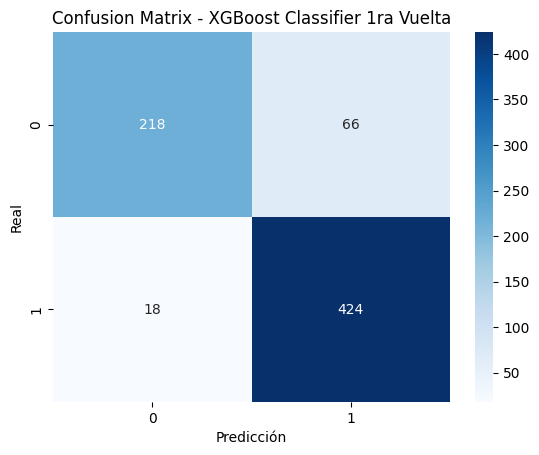

In [28]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", grid_xgb.best_params_)

# Predicciones
y_pred = grid_xgb.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test_e, y_pred))
print("\nPrecision:", precision_score(y_test_e, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test_e, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test_e, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test_e, y_pred))

f1_xgb_1 = f1_score(y_test_e, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test_e, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - XGBoost Classifier 1ra Vuelta")
plt.show()

# Me interesa el precision/recall

---

# CatBoost 1

In [29]:
pipe_cat = Pipeline([
    ("class", CatBoostClassifier(
        verbose=0
    ))
])

In [30]:
param_grid_cat = {
    "class__iterations": [300, 500],
    "class__learning_rate": [0.01, 0.1],
    "class__depth": [4, 6, 8]
}

In [31]:
grid_cat = GridSearchCV(
    estimator=pipe_cat,
    param_grid=param_grid_cat,
    cv=5,
    scoring="f1",
    n_jobs=-1
)
grid_cat

,estimator,Pipeline(step...x12066fa10>)])
,param_grid,"{'class__depth': [4, 6, ...], 'class__iterations': [300, 500], 'class__learning_rate': [0.01, 0.1]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [32]:
grid_cat.fit(X_train, y_train)

,estimator,Pipeline(step...x12066fa10>)])
,param_grid,"{'class__depth': [4, 6, ...], 'class__iterations': [300, 500], 'class__learning_rate': [0.01, 0.1]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


Mejores parámetros:
 {'class__depth': 4, 'class__iterations': 300, 'class__learning_rate': 0.01}

Accuracy: 0.8774104683195593

Precision: 0.8806766258388953

Recall: 0.8774104683195593

F1-score: 0.8749753632734073

Reporte de la clasificación:
               precision    recall  f1-score   support

     Dropout       0.91      0.76      0.83       284
    Graduate       0.86      0.95      0.90       442

    accuracy                           0.88       726
   macro avg       0.89      0.86      0.87       726
weighted avg       0.88      0.88      0.87       726



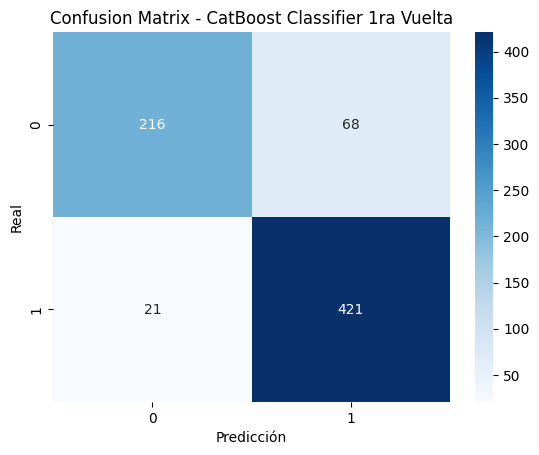

In [33]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", grid_cat.best_params_)

# Predicciones
y_pred = grid_cat.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test, y_pred))

f1_cat_1 = f1_score(y_test, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - CatBoost Classifier 1ra Vuelta")
plt.show()

---

# SVC 1 (Optimizado)

In [34]:
pipe_svc = Pipeline([
    ("scaler", StandardScaler()),
    ("class", SVC())
])

In [35]:
param_grid_svc = {
    "class__C": [0.1, 1, 10],
    "class__kernel": ["rbf", "poly"],
    "class__gamma": ["scale", "auto"]
}

In [36]:
grid_svc = GridSearchCV(
    estimator=pipe_svc,
    param_grid=param_grid_svc,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

In [37]:
grid_svc.fit(X_train, y_train)

,estimator,"Pipeline(step...ass', SVC())])"
,param_grid,"{'class__C': [0.1, 1, ...], 'class__gamma': ['scale', 'auto'], 'class__kernel': ['rbf', 'poly']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


Mejores parámetros:
 {'class__C': 0.1, 'class__gamma': 'scale', 'class__kernel': 'rbf'}

Accuracy: 0.8347107438016529

Precision: 0.8495928305897231

Recall: 0.8347107438016529

F1-score: 0.8267866070444013

Reporte de la clasificación:
               precision    recall  f1-score   support

     Dropout       0.92      0.63      0.75       284
    Graduate       0.80      0.97      0.88       442

    accuracy                           0.83       726
   macro avg       0.86      0.80      0.81       726
weighted avg       0.85      0.83      0.83       726



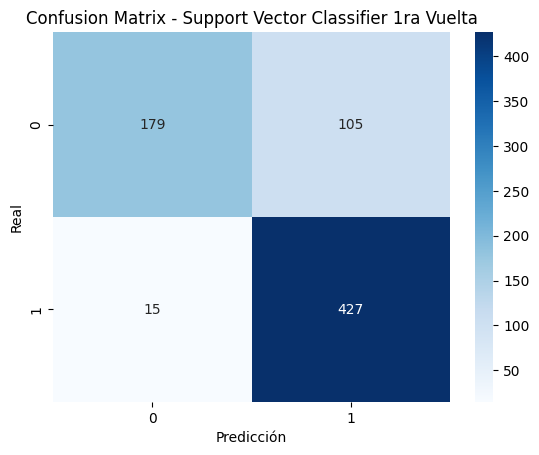

In [38]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", grid_svc.best_params_)

# Predicciones
y_pred = grid_svc.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test, y_pred))

f1_svc_1 = f1_score(y_test, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - Support Vector Classifier 1ra Vuelta")
plt.show()

# Me interesa el precision/recall

---

## K-Means (No Supervisado) 1

In [39]:
# K-Means — No supervisado

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)

labels = kmeans.labels_

silhouette_scores_1 = silhouette_score(X_train, labels)
print("Silhouette Score:", silhouette_scores_1)


Silhouette Score: 0.21506665632060085


---

---

# Ranking Modelos 1º Ronda:

In [40]:
# Vamos a comparar el resultado de las métricos de esta vuelta:

resultados = {
    "Modelo": [
        "Baseline SVC",
        "Logistic Regression",
        "Random Forest",
        "XGBoost",
        "CatBoost",
        "SVC (Optimizado)",
        "KMeans (k=5)"
    ],
    "Ranking (F1 / silhoutte)": [
        f1_baseline,
        f1_lr_1,      
        f1_rf_1,      
        f1_xgb_1,     
        f1_cat_1,     
        f1_svc_1,     
        silhouette_scores_1  
    ]
}

df_resultados = pd.DataFrame(resultados)
print("El ranking de la 1ra vuelta:")
ranking_1 = df_resultados.sort_values(by="Ranking (F1 / silhoutte)", ascending=False).reset_index(drop=True)
ranking_1


El ranking de la 1ra vuelta:


,Modelo,Ranking (F1 / silhoutte)
0,XGBoost,0.881937
1,Random Forest,0.877523
2,CatBoost,0.874975
3,Logistic Regression,0.830030
4,SVC (Optimizado),0.826787
5,Baseline SVC,0.707707
6,KMeans (k=5),0.215067


In [41]:
print("El top 3 en esta 1ra vuelta")
ranking_1.head(3)

El top 3 en esta 1ra vuelta


,Modelo,Ranking (F1 / silhoutte)
0,XGBoost,0.881937
1,Random Forest,0.877523
2,CatBoost,0.874975


---

---

---

# SEGUNDA VUELTA DE OPTIMIZACIÓN

### En esta optimización se tiene en cuenta que el target está desbalanceado (F1-Weighted)

---

---

---

# REGRESIÓN LOGÍSTICA 2

In [43]:
pipe_lr_bl = Pipeline([
    ('scaler', StandardScaler()),
    ('class', LogisticRegression(max_iter=500))
])

lr_params = {
    'scaler': [StandardScaler(), 'passthrough'],
    'class__C': [0.01, 0.1, 1, 10],
    'class__penalty': ['l2', None],
    'class__solver': ['lbfgs'] # Acepta el l2 y es el más rápido
}

grid_lr = GridSearchCV(pipe_lr_bl,
                        param_grid=lr_params,
                        cv=5,
                        scoring='f1_weighted',
                        verbose=1, 
                        n_jobs=-1)

grid_lr

,estimator,Pipeline(step...x_iter=500))])
,param_grid,"{'class__C': [0.01, 0.1, ...], 'class__penalty': ['l2', None], 'class__solver': ['lbfgs'], 'scaler': [StandardScaler(), 'passthrough']}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [44]:
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,estimator,Pipeline(step...x_iter=500))])
,param_grid,"{'class__C': [0.01, 0.1, ...], 'class__penalty': ['l2', None], 'class__solver': ['lbfgs'], 'scaler': [StandardScaler(), 'passthrough']}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


Mejores parámetros:
 {'class__C': 0.1, 'class__penalty': 'l2', 'class__solver': 'lbfgs', 'scaler': 'passthrough'}

Accuracy: 0.8774104683195593

Precision: 0.879817922798786

Recall: 0.8774104683195593

F1-score: 0.8752333658953253

Reporte de la clasificación:
               precision    recall  f1-score   support

     Dropout       0.90      0.77      0.83       284
    Graduate       0.86      0.95      0.90       442

    accuracy                           0.88       726
   macro avg       0.88      0.86      0.87       726
weighted avg       0.88      0.88      0.88       726



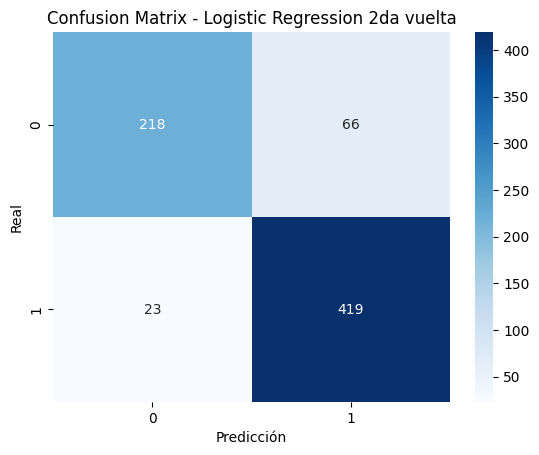

In [45]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", grid_lr.best_params_)

# Predicciones
y_pred = grid_lr.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test, y_pred))

f1_lr_2 = f1_score(y_test, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - Logistic Regression 2da vuelta")
plt.show()

# Me interesa el precision/recall

---

# RANDOM FOREST 2

In [46]:
# Pipeline
pipe_rf = Pipeline([
    ("class", RandomForestClassifier())
])

# Parametros de Random Forest Classifier
param_grid_rf = {
    "class__n_estimators": [200, 400],
    "class__max_depth": [10, 20, None],
    "class__min_samples_split": [2, 5],
    "class__min_samples_leaf": [1, 2]
}

# Parametros
grid_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)
grid_rf

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'class__max_depth': [10, 20, ...], 'class__min_samples_leaf': [1, 2], 'class__min_samples_split': [2, 5], 'class__n_estimators': [200, 400]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [47]:
grid_rf.fit(X_train, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'class__max_depth': [10, 20, ...], 'class__min_samples_leaf': [1, 2], 'class__min_samples_split': [2, 5], 'class__n_estimators': [200, 400]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


Mejores parámetros:
 {'class__max_depth': 20, 'class__min_samples_leaf': 2, 'class__min_samples_split': 2, 'class__n_estimators': 200}

Accuracy: 0.8746556473829201

Precision: 0.8777810366972156

Recall: 0.8746556473829201

F1-score: 0.8721658208750569

Reporte de la clasificación:
               precision    recall  f1-score   support

     Dropout       0.91      0.76      0.83       284
    Graduate       0.86      0.95      0.90       442

    accuracy                           0.87       726
   macro avg       0.88      0.85      0.86       726
weighted avg       0.88      0.87      0.87       726



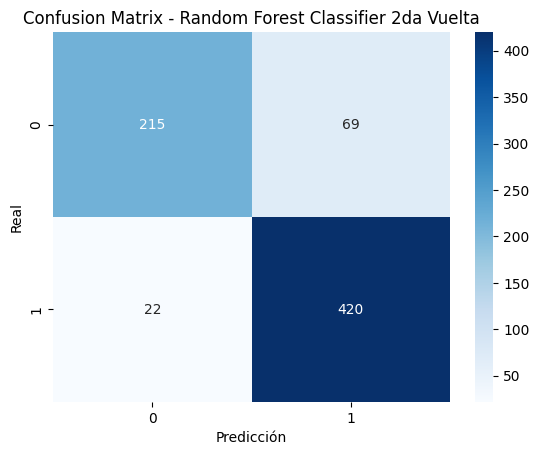

In [48]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", grid_rf.best_params_)

# Predicciones
y_pred = grid_rf.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test, y_pred))

f1_rf_2 = f1_score(y_test, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - Random Forest Classifier 2da Vuelta")
plt.show()

# Me interesa el precision/recall

---

# XGBoost 2

In [49]:
pipe_xgb = Pipeline([
    ("class", XGBClassifier(
        tree_method="hist",
        # Divide los valores en bins (histogramas)
        # Calcula el mejor split a partir del histograma, no del valor exacto
        # También se puede usar 'exact', pero consuma más RAM, más lento y tiene el mismo resultado casi siempre.
        eval_metric="mlogloss", # Métrica recomendada para multiclase, es decir, mide qué tan buena es la probabilidad predicha para cada clase.
        use_label_encoder=True # Para evitar un hiperparámetro obsoleto.
    ))
])

param_grid_xgb = {
    "class__n_estimators": [200, 400],
    "class__learning_rate": [0.01, 0.1],
    "class__max_depth": [4, 6, 8],
    "class__subsample": [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)
grid_xgb

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'class__learning_rate': [0.01, 0.1], 'class__max_depth': [4, 6, ...], 'class__n_estimators': [200, 400], 'class__subsample': [0.8, 1.0]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [50]:
grid_xgb.fit(X_train, y_train_e)

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'class__learning_rate': [0.01, 0.1], 'class__max_depth': [4, 6, ...], 'class__n_estimators': [200, 400], 'class__subsample': [0.8, 1.0]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


Mejores parámetros:
 {'class__learning_rate': 0.01, 'class__max_depth': 4, 'class__n_estimators': 400, 'class__subsample': 1.0}

Accuracy: 0.8856749311294766

Precision: 0.8893633932639349

Recall: 0.8856749311294766

F1-score: 0.8834039904684584

Reporte de la clasificación:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       284
           1       0.87      0.96      0.91       442

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.89      0.89      0.88       726



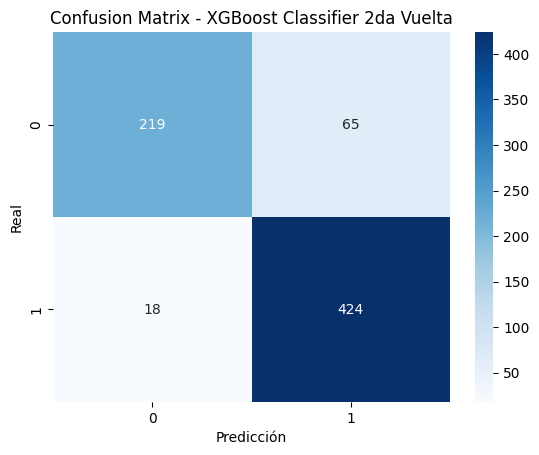

In [51]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", grid_xgb.best_params_)

# Predicciones
y_pred = grid_xgb.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test_e, y_pred))
print("\nPrecision:", precision_score(y_test_e, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test_e, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test_e, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test_e, y_pred))

f1_xgb_2 = f1_score(y_test_e, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test_e, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - XGBoost Classifier 2da Vuelta")
plt.show()

# Me interesa el precision/recall

---

# CatBoost 2

In [52]:
pipe_cat = Pipeline([
    ("class", CatBoostClassifier(
        verbose=0
    ))
])

param_grid_cat = {
    "class__iterations": [300, 500],
    "class__learning_rate": [0.01, 0.1],
    "class__depth": [4, 6, 8]
}

grid_cat = GridSearchCV(
    estimator=pipe_cat,
    param_grid=param_grid_cat,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)
grid_cat

,estimator,Pipeline(step...x120ca7bf0>)])
,param_grid,"{'class__depth': [4, 6, ...], 'class__iterations': [300, 500], 'class__learning_rate': [0.01, 0.1]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [53]:
grid_cat.fit(X_train, y_train)

,estimator,Pipeline(step...x120ca7bf0>)])
,param_grid,"{'class__depth': [4, 6, ...], 'class__iterations': [300, 500], 'class__learning_rate': [0.01, 0.1]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


Mejores parámetros:
 {'class__depth': 6, 'class__iterations': 500, 'class__learning_rate': 0.01}

Accuracy: 0.8856749311294766

Precision: 0.8898648446194803

Recall: 0.8856749311294766

F1-score: 0.8832801882226297

Reporte de la clasificación:
               precision    recall  f1-score   support

     Dropout       0.93      0.77      0.84       284
    Graduate       0.87      0.96      0.91       442

    accuracy                           0.89       726
   macro avg       0.90      0.86      0.88       726
weighted avg       0.89      0.89      0.88       726



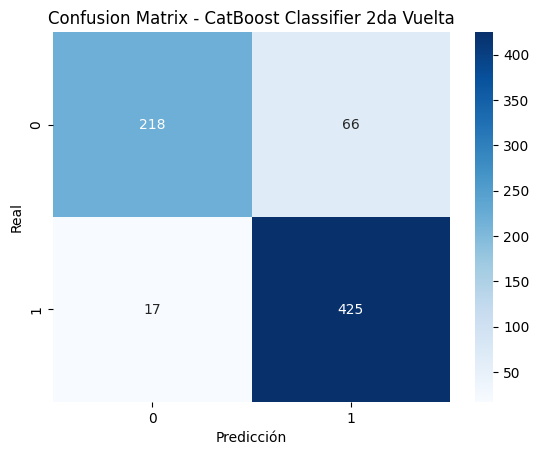

In [54]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", grid_cat.best_params_)

# Predicciones
y_pred = grid_cat.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test, y_pred))

f1_cat_2 = f1_score(y_test, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - CatBoost Classifier 2da Vuelta")
plt.show()

---

# SVC 2

In [55]:
pipe_svc = Pipeline([
    ("scaler", StandardScaler()),
    ("class", SVC())
])

param_grid_svc = {
    "class__C": [0.1, 1, 10],
    "class__kernel": ["rbf", "poly"],
    "class__gamma": ["scale", "auto"]
}

grid_svc = GridSearchCV(
    estimator=pipe_svc,
    param_grid=param_grid_svc,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

grid_svc

,estimator,"Pipeline(step...ass', SVC())])"
,param_grid,"{'class__C': [0.1, 1, ...], 'class__gamma': ['scale', 'auto'], 'class__kernel': ['rbf', 'poly']}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [56]:
grid_svc.fit(X_train, y_train)

,estimator,"Pipeline(step...ass', SVC())])"
,param_grid,"{'class__C': [0.1, 1, ...], 'class__gamma': ['scale', 'auto'], 'class__kernel': ['rbf', 'poly']}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


Mejores parámetros:
 {'class__C': 1, 'class__gamma': 'scale', 'class__kernel': 'rbf'}

Accuracy: 0.8539944903581267

Precision: 0.8591730088696768

Recall: 0.8539944903581267

F1-score: 0.8500121233445064

Reporte de la clasificación:
               precision    recall  f1-score   support

     Dropout       0.90      0.71      0.79       284
    Graduate       0.83      0.95      0.89       442

    accuracy                           0.85       726
   macro avg       0.87      0.83      0.84       726
weighted avg       0.86      0.85      0.85       726



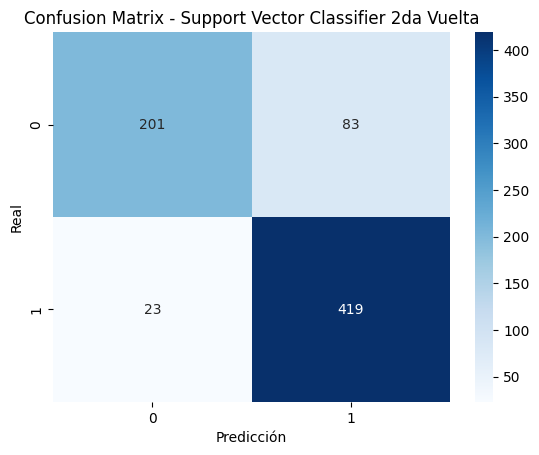

In [57]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", grid_svc.best_params_)

# Predicciones
y_pred = grid_svc.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test, y_pred))

f1_svc_2 = f1_score(y_test, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - Support Vector Classifier 2da Vuelta")
plt.show()

# Me interesa el precision/recall

---

# K-Menas (No Supervisado) 2

In [58]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train) for k in range(1,20)]
silhouette_scores = [silhouette_score(X_train, model.labels_) for model in kmeans_per_k[1:]]

silhouette_scores

[0.2845148969605227,
 0.27903502029184113,
 0.21826973927573254,
 0.21506665632060085,
 0.2155860174406749,
 0.23384288283119742,
 0.22167888509641018,
 0.22955512966808556,
 0.22167636177241082,
 0.23223030434751538,
 0.21755963756752897,
 0.22269969257320527,
 0.22342147778752594,
 0.22288316672459604,
 0.22519773299387658,
 0.21945378720140776,
 0.22842939527069012,
 0.23118236031926906]

In [59]:
kmeans_per_k = [KMeans(n_clusters=k,random_state=42).fit(X_train) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

#inertias

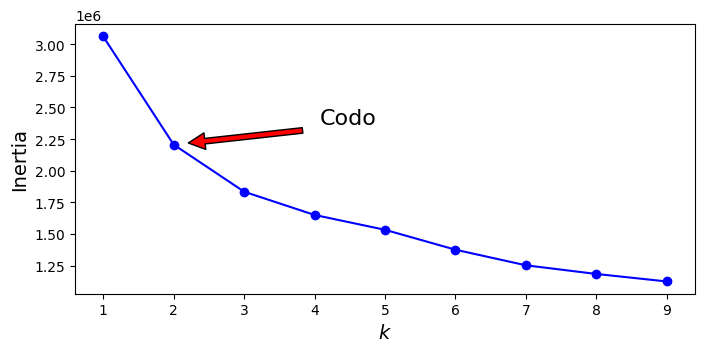

In [60]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Codo',
             xy=(2, inertias[1]),
             xytext=(0.4, 0.65),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='red', shrink=0.1)
            )
plt.show()

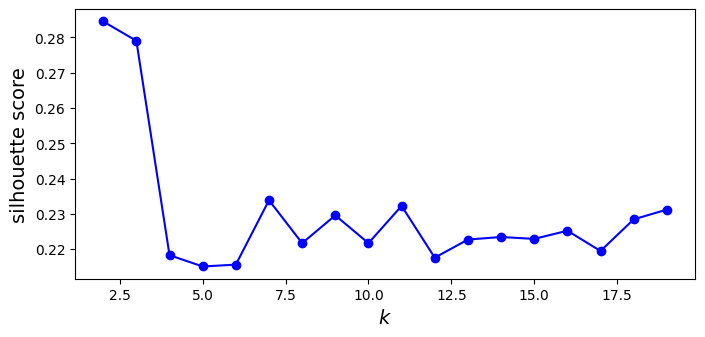

In [61]:
# calcula los scores de silueta para cada modelo
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("silhouette score", fontsize=14)
plt.show()

In [62]:
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(X_train, y_train_e)

silhouette_scores_2 = silhouette_score(X_train, kmeans_2.labels_)
silhouette_scores_2


0.2845148969605227

***Este modelo ya no se puede optimizar más, a no ser que pruebe con otros modelos No Supervisados***

---

# Ranking Modelos 2º Ronda

In [64]:
# Vamos a comparar el resultado de las métricos de esta vuelta:

resultados = {
    "Modelo": [
        "Baseline SVC",
        "Logistic Regression",
        "Random Forest",
        "XGBoost",
        "CatBoost",
        "SVC (Optimizado)",
        "KMeans(k=2)"
    ],
    "Ranking (F1 Weighted / silhoutte)": [
        f1_baseline,
        f1_lr_2,      
        f1_rf_2,      
        f1_xgb_2,     
        f1_cat_2,     
        f1_svc_2,     
        silhouette_scores_2
    ]
}

df_resultados = pd.DataFrame(resultados)
print("El ranking de la 2da vuelta:")
ranking_2 = df_resultados.sort_values(by="Ranking (F1 Weighted / silhoutte)", ascending=False).reset_index(drop=True)
ranking_2


El ranking de la 2da vuelta:


,Modelo,Ranking (F1 Weighted / silhoutte)
0,XGBoost,0.883404
1,CatBoost,0.883280
2,Logistic Regression,0.875233
3,Random Forest,0.872166
4,SVC (Optimizado),0.850012
5,Baseline SVC,0.707707
6,KMeans(k=2),0.284515


In [ ]:
print("El top 3 en esta 2da vuelta")
ranking_2.head(3)

El top 3 en esta 2da vuelta


,Modelo,Ranking (F1 Weighted / silhoutte)
0,XGBoost,0.883404
1,CatBoost,0.883280
2,Logistic Regression,0.875233


---

---

---

# TERCERA VUELTA DE OPTIMIZACIÓN:

### Vamos a optimizar los modelos y comparar KMeans con DBSCAN

---

---

---

# REGRESIÓN LOGISTICA 3

In [21]:
pipe_lr_bl = Pipeline([
    ('scaler', StandardScaler()),
    #('class', LogisticRegression(max_iter=500)) Segunda vuelta
    ('class', LogisticRegression(max_iter=1000)) # Más pruebas
])

lr_params = {
    # Vuelta 2
    #'scaler': [StandardScaler(), 'passthrough'],
    #'class__C': [0.01, 0.1, 1, 10],
    #'class__penalty': ['l2', None],
    #'class__solver': ['lbfgs']
    'scaler': [StandardScaler(), 'passthrough'],
    'class__C': [0.05, 0.1, 0.5], # Buscamos optimizar el C
    'class__penalty': ['l2', None], 
    'class__solver': ['lbfgs'] # Acepta el l2 y es el más rápido
}

grid_lr = GridSearchCV(pipe_lr_bl,
                        param_grid=lr_params,
                        cv=5,
                        scoring='f1_weighted',
                        verbose=1, 
                        n_jobs=-1)

grid_lr

,estimator,Pipeline(step..._iter=1000))])
,param_grid,"{'class__C': [0.05, 0.1, ...], 'class__penalty': ['l2', None], 'class__solver': ['lbfgs'], 'scaler': [StandardScaler(), 'passthrough']}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [22]:
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,Pipeline(step..._iter=1000))])
,param_grid,"{'class__C': [0.05, 0.1, ...], 'class__penalty': ['l2', None], 'class__solver': ['lbfgs'], 'scaler': [StandardScaler(), 'passthrough']}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


Mejores parámetros:
 {'class__C': 0.5, 'class__penalty': 'l2', 'class__solver': 'lbfgs', 'scaler': 'passthrough'}

Accuracy: 0.8856749311294766

Precision: 0.8884533089256457

Recall: 0.8856749311294766

F1-score: 0.883644599655191

Reporte de la clasificación:
               precision    recall  f1-score   support

     Dropout       0.92      0.78      0.84       284
    Graduate       0.87      0.95      0.91       442

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.88       726



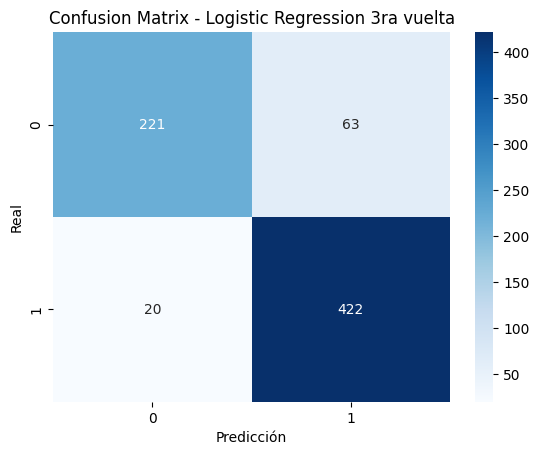

In [23]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", grid_lr.best_params_)

# Predicciones
y_pred = grid_lr.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test, y_pred))

f1_lr_3 = f1_score(y_test, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - Logistic Regression 3ra vuelta")
plt.show()

# Me interesa el precision/recall

---

# RANDOM FOREST 3

In [16]:
# Pipeline
pipe_rf = Pipeline([
    ("class", RandomForestClassifier())
])

# Parametros de Random Forest Classifier
param_grid_rf = {
    # Vuelta 2
    # "class__n_estimators": [200, 400], # 400
    # "class__max_depth": [10, 20, None], # None
    # "class__min_samples_split": [2, 5], # 2
    # "class__min_samples_leaf": [1, 2] #1
    
    "class__n_estimators": [350, 400, 450], # 450
    "class__max_depth": [30, 40], # 30
    "class__min_samples_split": [1, 2, 3], # 2
    "class__min_samples_leaf": [1,2 ] # 2
}

# Parametros
grid_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)
grid_rf

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'class__max_depth': [30, 40], 'class__min_samples_leaf': [1, 2], 'class__min_samples_split': [1, 2, ...], 'class__n_estimators': [350, 400, ...]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [17]:
grid_rf.fit(X_train, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'class__max_depth': [30, 40], 'class__min_samples_leaf': [1, 2], 'class__min_samples_split': [1, 2, ...], 'class__n_estimators': [350, 400, ...]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,400


In [18]:
# usa pickle y guarda el estimador GridsearchCV en un archivo

filename = "../models/otros/RF_3.pkl"

modelo_rf_3 = grid_rf.best_estimator_

with open(filename, "wb") as archivo_salida:
    pickle.dump(modelo_rf_3, archivo_salida)

In [19]:
# Para leer el modelo

path = "../models/otros/RF_3.pkl"
with open(path, 'rb') as archivo_entrada:
    modelo_rf_importado = pickle.load(archivo_entrada)

# modelo_rf_importado.predict_proba(X_test)


Mejores parámetros:
 Pipeline(steps=[('class',
                 RandomForestClassifier(max_depth=30, n_estimators=400))])

Accuracy: 0.8732782369146006

Precision: 0.8756974911857067

Recall: 0.8732782369146006

F1-score: 0.8709620372767373

Reporte de la clasificación:
               precision    recall  f1-score   support

     Dropout       0.90      0.76      0.82       284
    Graduate       0.86      0.95      0.90       442

    accuracy                           0.87       726
   macro avg       0.88      0.85      0.86       726
weighted avg       0.88      0.87      0.87       726



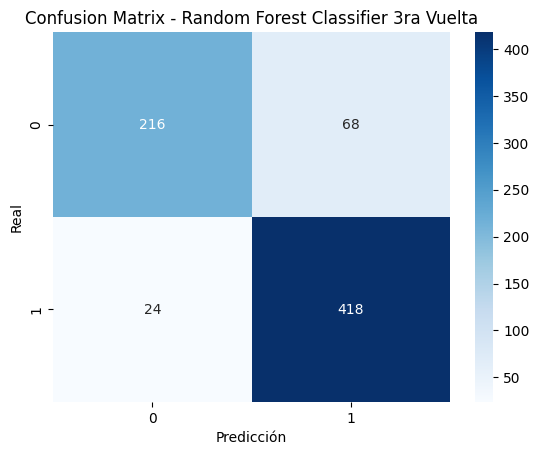

In [20]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", modelo_rf_importado)

# Predicciones
y_pred = modelo_rf_importado.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test, y_pred))

f1_rf_3 = f1_score(y_test, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - Random Forest Classifier 3ra Vuelta")
plt.show()

# Me interesa el precision/recall

---

# XGBoost 3

In [28]:
pipe_xgb = Pipeline([
    ("class", XGBClassifier(
        tree_method="hist",
        # Divide los valores en bins (histogramas)
        # Calcula el mejor split a partir del histograma, no del valor exacto
        # También se puede usar 'exact', pero consuma más RAM, más lento y tiene el mismo resultado casi siempre.
        eval_metric="mlogloss", # Métrica recomendada para multiclase, es decir, mide qué tan buena es la probabilidad predicha para cada clase.
        use_label_encoder=True # Para evitar un hiperparámetro obsoleto.
    ))
])

param_grid_xgb = {
    # Vuelta 2
    #"class__n_estimators": [200, 400], #400
    #"class__learning_rate": [0.01, 0.1], #0.01
    #"class__max_depth": [4, 6, 8], #4
    #"class__subsample": [0.8, 1.0] #1.0

    "class__n_estimators": [350, 400, 450], 
    "class__learning_rate": [0.01],  
    "class__max_depth": [3, 4, 5], # 5
    "class__subsample": [0.7, 0.85, 1.0], # 0.85 La llamada a XGBoost
    
    "class__colsample_bytree": [0.6, 0.8, 1.0], # Reduce la dependencia entre arboles
    "class__min_child_weight": [1, 3, 5], # El mínimo de peso de los nodos hijos
    "class__gamma": [0, 0.1, 0.3], # Obliga que cada split aporta un mínimo 
    "class__reg_alpha": [0, 0.01, 0.1], # L1 suavizar
    "class__reg_lambda": [1, 2] # L2 suavizar
}

grid_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)
grid_xgb

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'class__colsample_bytree': [0.6, 0.8, ...], 'class__gamma': [0, 0.1, ...], 'class__learning_rate': [0.01], 'class__max_depth': [3, 4, ...], ...}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [29]:
grid_xgb.fit(X_train, y_train_e)

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'class__colsample_bytree': [0.6, 0.8, ...], 'class__gamma': [0, 0.1, ...], 'class__learning_rate': [0.01], 'class__max_depth': [3, 4, ...], ...}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


Mejores parámetros:
 {'class__colsample_bytree': 0.8, 'class__gamma': 0.3, 'class__learning_rate': 0.01, 'class__max_depth': 5, 'class__min_child_weight': 3, 'class__n_estimators': 400, 'class__reg_alpha': 0, 'class__reg_lambda': 2, 'class__subsample': 0.85}

Accuracy: 0.8856749311294766

Precision: 0.8888930466149653

Recall: 0.8856749311294766

F1-score: 0.883525455029778

Reporte de la clasificación:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       284
           1       0.87      0.96      0.91       442

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.88       726



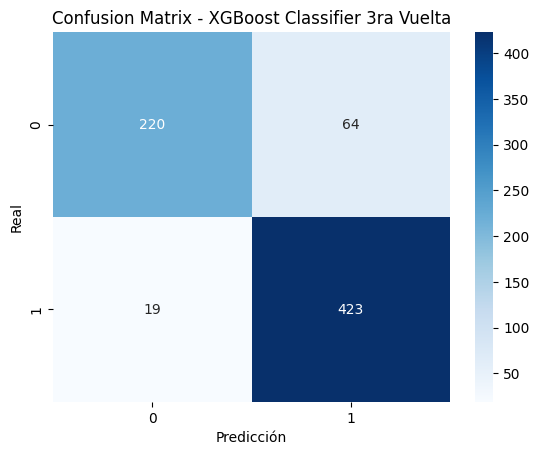

In [30]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", grid_xgb.best_params_)

# Predicciones
y_pred = grid_xgb.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test_e, y_pred))
print("\nPrecision:", precision_score(y_test_e, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test_e, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test_e, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test_e, y_pred))

f1_xgb_3 = f1_score(y_test_e, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test_e, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - XGBoost Classifier 3ra Vuelta")
plt.show()

# Me interesa el precision/recall

---

# CatBoost 3

In [31]:
pipe_cat = Pipeline([
    ("class", CatBoostClassifier(
        verbose=0
    ))
])

param_grid_cat = {
    # Vuelta 2
    #"class__iterations": [300, 500],
    #"class__learning_rate": [0.01, 0.1],
    #"class__depth": [4, 6, 8]

    #Vuelta 3

    "class__iterations": [300, 500, 700],
    "class__learning_rate": [0.01, 0.1],
    "class__depth": [4, 6, 8],
    
    # Regularización
    "class__l2_leaf_reg": [1, 3, 5, 7],
}

grid_cat = GridSearchCV(
    estimator=pipe_cat,
    param_grid=param_grid_cat,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)
grid_cat

,estimator,Pipeline(step...x11e7cb4d0>)])
,param_grid,"{'class__depth': [4, 6, ...], 'class__iterations': [300, 500, ...], 'class__l2_leaf_reg': [1, 3, ...], 'class__learning_rate': [0.01, 0.1]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [32]:
grid_cat.fit(X_train, y_train)

,estimator,Pipeline(step...x11e7cb4d0>)])
,param_grid,"{'class__depth': [4, 6, ...], 'class__iterations': [300, 500, ...], 'class__l2_leaf_reg': [1, 3, ...], 'class__learning_rate': [0.01, 0.1]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


Mejores parámetros:
 {'class__depth': 4, 'class__iterations': 300, 'class__l2_leaf_reg': 5, 'class__learning_rate': 0.1}

Accuracy: 0.8746556473829201

Precision: 0.8787426242186961

Recall: 0.8746556473829201

F1-score: 0.87189176804088

Reporte de la clasificación:
               precision    recall  f1-score   support

     Dropout       0.91      0.75      0.82       284
    Graduate       0.86      0.95      0.90       442

    accuracy                           0.87       726
   macro avg       0.89      0.85      0.86       726
weighted avg       0.88      0.87      0.87       726



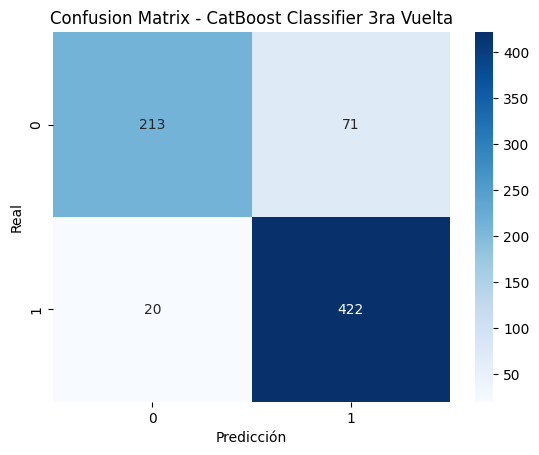

In [33]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", grid_cat.best_params_)

# Predicciones
y_pred = grid_cat.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test, y_pred))

f1_cat_3 = f1_score(y_test, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - CatBoost Classifier 3ra Vuelta")
plt.show()

---

# SVC 3

In [34]:
pipe_svc = Pipeline([
    ("scaler", StandardScaler()),
    ("class", SVC())
])

param_grid_svc = {
    #Vuelta 2
    #"class__C": [0.1, 1, 10],
    #"class__kernel": ["rbf", "poly"],
    #"class__gamma": ["scale", "auto"]

    "class__C": [3, 4, 5],
    "class__kernel": ["rbf", "poly"],
    "class__gamma": ["scale", "auto"]
}

grid_svc = GridSearchCV(
    estimator=pipe_svc,
    param_grid=param_grid_svc,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

grid_svc

,estimator,"Pipeline(step...ass', SVC())])"
,param_grid,"{'class__C': [3, 4, ...], 'class__gamma': ['scale', 'auto'], 'class__kernel': ['rbf', 'poly']}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [35]:
grid_svc.fit(X_train, y_train)

,estimator,"Pipeline(step...ass', SVC())])"
,param_grid,"{'class__C': [3, 4, ...], 'class__gamma': ['scale', 'auto'], 'class__kernel': ['rbf', 'poly']}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


Mejores parámetros:
 {'class__C': 3, 'class__gamma': 'scale', 'class__kernel': 'rbf'}

Accuracy: 0.8567493112947658

Precision: 0.8610210015063882

Recall: 0.8567493112947658

F1-score: 0.853182331047418

Reporte de la clasificación:
               precision    recall  f1-score   support

     Dropout       0.89      0.72      0.80       284
    Graduate       0.84      0.95      0.89       442

    accuracy                           0.86       726
   macro avg       0.87      0.83      0.84       726
weighted avg       0.86      0.86      0.85       726



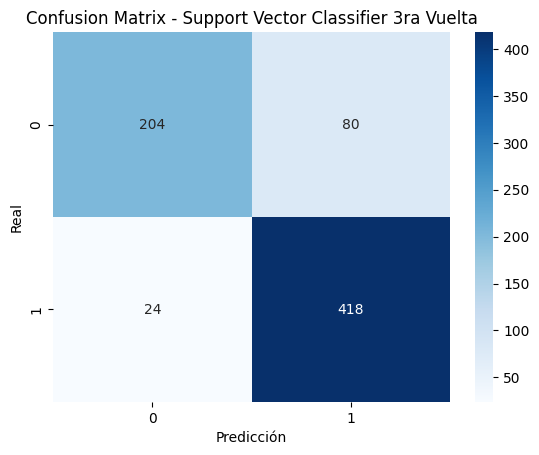

In [36]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", grid_svc.best_params_)

# Predicciones
y_pred = grid_svc.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test, y_pred))

f1_svc_3 = f1_score(y_test, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - Support Vector Classifier 3ra Vuelta")
plt.show()

# Me interesa el precision/recall

# DBSCAN

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

dbscan = DBSCAN(eps=1, min_samples = 5)

dbscan.fit(X_train_scaled)

#print(X_train_scaled.shape)
#print(len(dbscan.core_sample_indices_)) 
#print(np.unique(dbscan.labels_))
#print(dbscan.components_) # Posición de los cores

sil = silhouette_score(X_train_scaled, dbscan.labels_)
print("Silhouette:", sil)

Silhouette: -0.09018510066856424


### Voy a buscar el epsilon más optimo

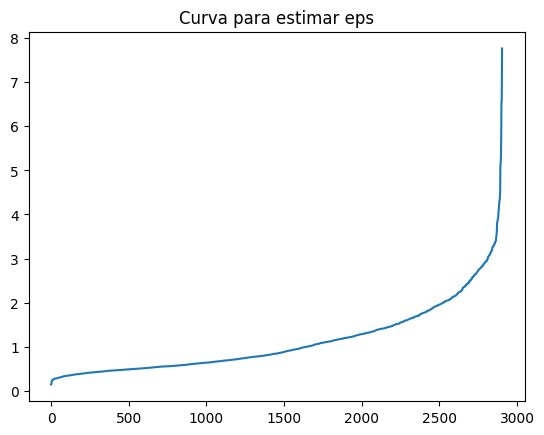

In [40]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_train_scaled)
distances, indices = neighbors_fit.kneighbors(X_train_scaled)

distances = np.sort(distances[:,4])
plt.plot(distances)
plt.title("Curva para estimar eps")
plt.show()

In [41]:
cluster_labels = dbscan.labels_
df_eval = pd.DataFrame({"cluster": cluster_labels, "target": y_train.values})

pd.crosstab(df_eval["cluster"], df_eval["target"])


target,Dropout,Graduate
cluster,,
-1,603,445
0,196,784
1,1,7
2,6,45
3,16,16
4,36,114
5,35,203
6,12,9
7,7,0


In [42]:
# Prueba con eps de 2.5
dbscan1 = DBSCAN(eps=2.5, min_samples = 4)

dbscan1.fit(X_train_scaled)

sil1 = silhouette_score(X_train_scaled, dbscan1.labels_)
print("Silhouette:", sil)

cluster_labels = dbscan1.labels_
df_eval = pd.DataFrame({"cluster": cluster_labels, "target": y_train.values})

pd.crosstab(df_eval["cluster"], df_eval["target"])


Silhouette: -0.09018510066856424


target,Dropout,Graduate
cluster,,
-1,68,48
0,732,1670
1,320,12
2,16,28
3,0,4
4,1,5


In [43]:
# Prueba con eps de 2.7
dbscan2 = DBSCAN(eps=2.7, min_samples = 4)

dbscan2.fit(X_train_scaled)

sil2 = silhouette_score(X_train_scaled, dbscan2.labels_)
print("Silhouette:", sil)

cluster_labels = dbscan2.labels_
df_eval = pd.DataFrame({"cluster": cluster_labels, "target": y_train.values})

pd.crosstab(df_eval["cluster"], df_eval["target"])

Silhouette: -0.09018510066856424


target,Dropout,Graduate
cluster,,
-1,40,35
0,738,1684
1,324,15
2,21,29
3,7,0
4,3,4
5,4,0


In [92]:
# Prueba con eps de 2.8
dbscan = DBSCAN(eps=2.8, min_samples = 4)

dbscan.fit(X_train_scaled)

sil3 = silhouette_score(X_train_scaled, dbscan.labels_)
print("Silhouette:", sil)

cluster_labels = dbscan.labels_
df_eval = pd.DataFrame({"cluster": cluster_labels, "target": y_train.values})

pd.crosstab(df_eval["cluster"], df_eval["target"])

Silhouette: -0.09018510066856424


target,Dropout,Graduate
cluster,,
-1,33,28
0,739,1685
1,329,18
2,22,32
3,4,0
4,7,0
5,3,4


In [93]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

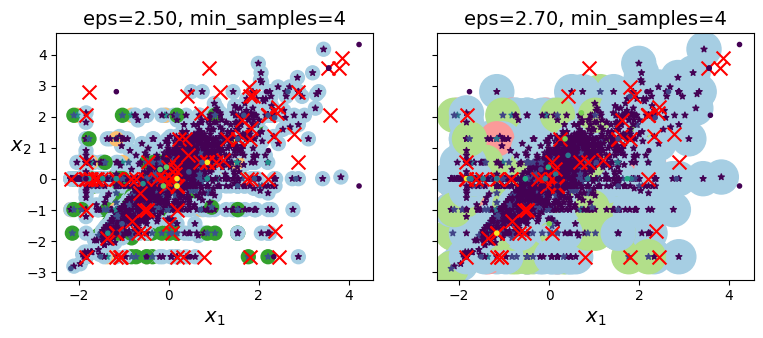

In [94]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan1, X_train_scaled, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X_train_scaled, size=600, show_ylabels=False)

plt.show()

### Veo que todos mis puntos están sobrepuestos, así es complicado con DBSCAN

---

# Ranking Modelos 3º Ronda

In [44]:
# Vamos a comparar el resultado de las métricos de esta vuelta:

resultados = {
    "Modelo": [
        "Baseline SVC",
        "Logistic Regression",
        "Random Forest",
        "XGBoost",
        "CatBoost",
        "SVC (Optimizado)",
        "DBSCAN (eps = 2.7)"
    ],
    "Ranking (F1 Weighted / silhoutte)": [
        f1_baseline,
        f1_lr_3,      
        f1_rf_3,      
        f1_xgb_3,     
        f1_cat_3,     
        f1_svc_3,
        sil2,     

    ]
}

df_resultados = pd.DataFrame(resultados)
print("El ranking de la 3ra vuelta:")
ranking_3 = df_resultados.sort_values(by="Ranking (F1 Weighted / silhoutte)", ascending=False).reset_index(drop=True)
ranking_3


El ranking de la 3ra vuelta:


,Modelo,Ranking (F1 Weighted / silhoutte)
0,Logistic Regression,0.883645
1,XGBoost,0.883525
2,CatBoost,0.871892
3,Random Forest,0.870962
4,SVC (Optimizado),0.853182
5,Baseline SVC,0.707707
6,DBSCAN (eps = 2.7),0.217711


In [45]:
print("El top 3 en esta 3ra vuelta")
ranking_3.head(3)

El top 3 en esta 3ra vuelta


,Modelo,Ranking (F1 Weighted / silhoutte)
0,Logistic Regression,0.883645
1,XGBoost,0.883525
2,CatBoost,0.871892


### El top 3 es el único que se mueve, así que intentaré optimizar esos 3 modelos

---

---

---

#### En base al top 3 de modelos de la 3ra vuelta optimizamos los hiperparámetros, a ver si puedo llegar a 0.9

| |	Modelo | Ranking (F1 Weighted / silhoutte)
|--|--|--|
|1|Logistic Regression|0.883645|
|2|XGBoost|0.883525|
|3|CatBoost|0.871892|



---

---

---

# TOP 3 A LARGO DE LAS VUELTAS

In [117]:
ranking_1.head(3)

,Modelo,Ranking (F1 / silhoutte)
0,XGBoost,0.881937
1,Random Forest,0.877523
2,CatBoost,0.874975


In [118]:
ranking_2.head(3)

,Modelo,Ranking (F1 Weighted / silhoutte)
0,XGBoost,0.883404
1,CatBoost,0.883280
2,Logistic Regression,0.875233


In [46]:
ranking_3.head(3)

,Modelo,Ranking (F1 Weighted / silhoutte)
0,Logistic Regression,0.883645
1,XGBoost,0.883525
2,CatBoost,0.871892


### Los modelos que más se repiten a lo largo de las vueltas son: Radom Forest, Regresión Logistica, XGBoost, CatBoost

---

---

---

Tras intentar optimizar los 4 modelos, solo conseguí optimizar los siguiente:

# Vuelta 4:

## REGRESIÓN LOGISTICA 4

In [121]:
pipe_lr_bl = Pipeline([
    ('scaler', StandardScaler()),
    #('class', LogisticRegression(max_iter=500)) Segunda vuelta
    ('class', LogisticRegression(max_iter=1000)) # Más pruebas
])

lr_params = {
    # Vuelta 2
    #'scaler': [StandardScaler(), 'passthrough'],
    #'class__C': [0.01, 0.1, 1, 10],
    #'class__penalty': ['l2', None],
    #'class__solver': ['lbfgs']
    
    # Vuelta 3
    #'scaler': [StandardScaler(), 'passthrough'],
    #'class__C': [0.05, 0.1, 0.5], # Buscamos optimizar el C
    #'class__penalty': ['l2', None], 
    #'class__solver': ['lbfgs'] # Acepta el l2 y es el más rápido

    # Vuelta 4
    'scaler': [StandardScaler(), 'passthrough'],

    # C alrededor del valor ganador (0.5)
    'class__C': [0.3, 0.5, 0.7, 1.0],

    # Penalty: extendemos a "elasticnet" (solo si solver = saga)
    'class__penalty': ['l2', 'elasticnet'],

    # Solvers compatibles
    # saga permite L1+L2 y elasticnet
    'class__solver': ['lbfgs', 'saga'],

    # L1_ratio solo se usa si penalty = elasticnet
    'class__l1_ratio': [None, 0.1, 0.3, 0.5],

    # Podría mejorar si hay clases desbalanceadas
    'class__class_weight': [None, 'balanced']
}

grid_lr = GridSearchCV(pipe_lr_bl,
                        param_grid=lr_params,
                        cv=5,
                        scoring='f1_weighted',
                        verbose=1, 
                        n_jobs=-1)

grid_lr

,estimator,Pipeline(step..._iter=1000))])
,param_grid,"{'class__C': [0.3, 0.5, ...], 'class__class_weight': [None, 'balanced'], 'class__l1_ratio': [None, 0.1, ...], 'class__penalty': ['l2', 'elasticnet'], ...}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [122]:
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


,estimator,Pipeline(step..._iter=1000))])
,param_grid,"{'class__C': [0.3, 0.5, ...], 'class__class_weight': [None, 'balanced'], 'class__l1_ratio': [None, 0.1, ...], 'class__penalty': ['l2', 'elasticnet'], ...}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [ ]:
# usa pickle y guarda el estimador GridsearchCV en un archivo

filename = "../models/otros/LR_4.pkl"

modelo_lr_4 = grid_lr.best_estimator_

with open(filename, "wb") as archivo_salida:
    pickle.dump(modelo_lr_4, archivo_salida)

In [ ]:
# Para leer el modelo

path = "../models/otros/LR_4.pkl"
with open(path, 'rb') as archivo_entrada:
    modelo_lr_importado = pickle.load(archivo_entrada)

# modelo_lr_importado.predict_proba(X_test)


Mejores parámetros:
 <bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('class',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    l1_ratio=0.5, max_iter=1000,
                                    penalty='elasticnet', solver='saga'))])>

Accuracy: 0.8774104683195593

Precision: 0.8769183188207872

Recall: 0.8774104683195593

F1-score: 0.8769533227183357

Reporte de la clasificación:
               precision    recall  f1-score   support

     Dropout       0.86      0.82      0.84       284
    Graduate       0.89      0.91      0.90       442

    accuracy                           0.88       726
   macro avg       0.87      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726



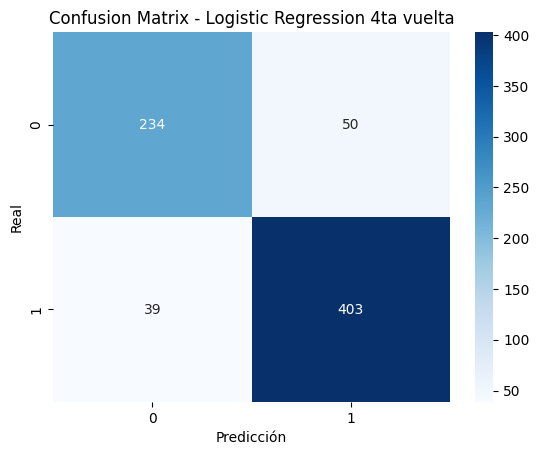

In [128]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", modelo_lr_importado.get_params)

# Predicciones
y_pred = modelo_lr_importado.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test, y_pred))

f1_lr_4 = f1_score(y_test, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - Logistic Regression 4ta vuelta")
plt.show()

# Me interesa el precision/recall

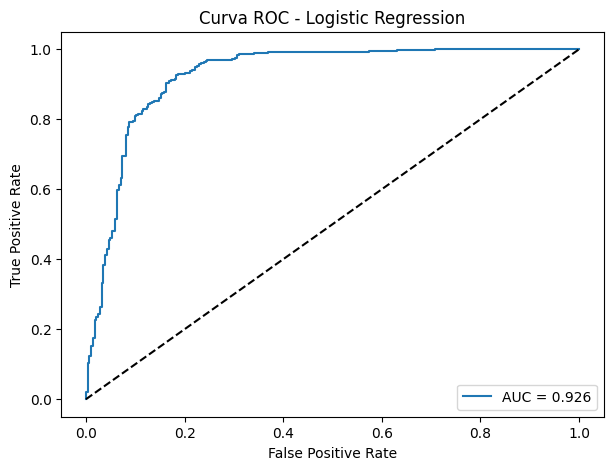

In [169]:
# Probabilidades de clase (Graduate)
y_pred = modelo_lr_importado.predict_proba(X_test)[:, 1] # Graduate
#y_pred = modelo_lr_importado.predict_proba(X_test)[:, 0] # Dropout

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label="Graduate") #0.926
#fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label="Dropout") # 0.074

# AUC
roc_auc_lr = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_lr:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Logistic Regression")
plt.legend()
plt.show()

---

## XGBoost 4

In [107]:
pipe_xgb = Pipeline([
    ("class", XGBClassifier(
        tree_method="hist",
        # Divide los valores en bins (histogramas)
        # Calcula el mejor split a partir del histograma, no del valor exacto
        # También se puede usar 'exact', pero consuma más RAM, más lento y tiene el mismo resultado casi siempre.
        eval_metric="mlogloss", # Métrica recomendada para multiclase, es decir, mide qué tan buena es la probabilidad predicha para cada clase.
        use_label_encoder=True # Para evitar un hiperparámetro obsoleto.
    ))
])

param_grid_xgb = {
    # Vuelta 2
    #"class__n_estimators": [200, 400], #400
    #"class__learning_rate": [0.01, 0.1], #0.01
    #"class__max_depth": [4, 6, 8], #4
    #"class__subsample": [0.8, 1.0] #1.0

    # Vuelta 3
    #"class__n_estimators": [350, 400, 450], 
    #"class__learning_rate": [0.01],  
    #"class__max_depth": [3, 4, 5], 
    #"class__subsample": [0.7, 0.85, 1.0], # 0.85 La llamada a XGBoost
    #"class__colsample_bytree": [0.6, 0.8, 1.0], # 0.8 Reduce la dependencia entre arboles
    #"class__min_child_weight": [1, 3, 5], # 3 El mínimo de peso de los nodos hijos
    #"class__gamma": [0, 0.1, 0.3], # 0.3 Obliga que cada split aporta un mínimo 
    #"class__reg_alpha": [0, 0.01, 0.1], # 0 L1 suavizar
    #"class__reg_lambda": [1, 2] # 2 L2 suavizar

    # Vuelta 4
    "class__n_estimators": [350, 400],
    "class__learning_rate": [0.01, 0.02],  
    "class__max_depth": [4, 5, 6],
    "class__subsample": [0.85, 0.9],
    "class__colsample_bytree": [0.7, 0.8, 0.9],
    "class__min_child_weight": [2, 3],
    "class__gamma": [0.3, 0.4],
    "class__reg_alpha": [0, 0.01],
    "class__reg_lambda": [1, 2],

    "class__max_bin": [560], # Optimiza el histograma 
    "class__max_leaves": [None, 60] # Controla Nº de hojas max del arbol
}

grid_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)
grid_xgb

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'class__colsample_bytree': [0.7, 0.8, ...], 'class__gamma': [0.3, 0.4], 'class__learning_rate': [0.01, 0.02], 'class__max_bin': [560], ...}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [ ]:
X_train.shape

(2904, 12)

In [ ]:
grid_xgb.fit(X_train, y_train_e)

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'class__colsample_bytree': [0.7, 0.8, ...], 'class__gamma': [0.3, 0.4], 'class__learning_rate': [0.01, 0.02], 'class__max_bin': [560], ...}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [ ]:
# usa pickle y guarda el estimador GridsearchCV en un archivo
import pickle

filename = "../models/XGBoostC_4.pkl"

modelo_xgb_4 = grid_xgb.best_estimator_

with open(filename, "wb") as archivo_salida:
    pickle.dump(modelo_xgb_4, archivo_salida)

In [ ]:
# Para leer el modelo

path = "../models/XGBoostC_4.pkl"
with open(path, 'rb') as archivo_entrada:
    modelo_xgb_importado = pickle.load(archivo_entrada)

# modelo_xgb_importado.predict_proba(X_test)


In [131]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", modelo_xgb_importado.get_params)


Mejores parámetros:
 <bound method Pipeline.get_params of Pipeline(steps=[('class',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, feature_weights=None,
                               gamma=0.4, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_bin=560, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constrain


Accuracy: 0.8870523415977961

Precision: 0.8901107029894908

Recall: 0.8870523415977961

F1-score: 0.8849879027901354

Reporte de la clasificación:
               precision    recall  f1-score   support

           0       0.92      0.78      0.84       284
           1       0.87      0.96      0.91       442

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.89      0.89      0.88       726



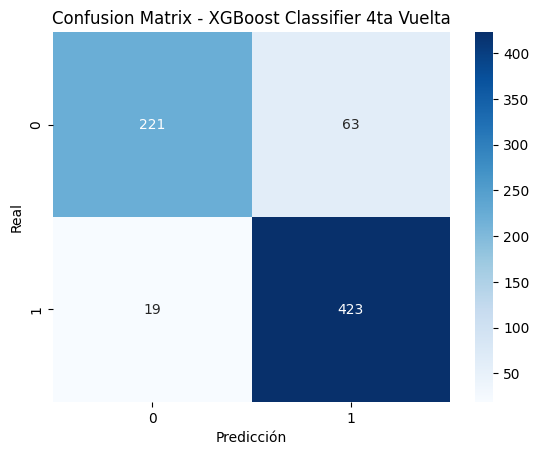

In [132]:
# Predicciones
y_pred = modelo_xgb_importado.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test_e, y_pred))
print("\nPrecision:", precision_score(y_test_e, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test_e, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test_e, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test_e, y_pred))

f1_xgb_4 = f1_score(y_test_e, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test_e, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - XGBoost Classifier 4ta Vuelta")
plt.show()

# Me interesa el precision/recall

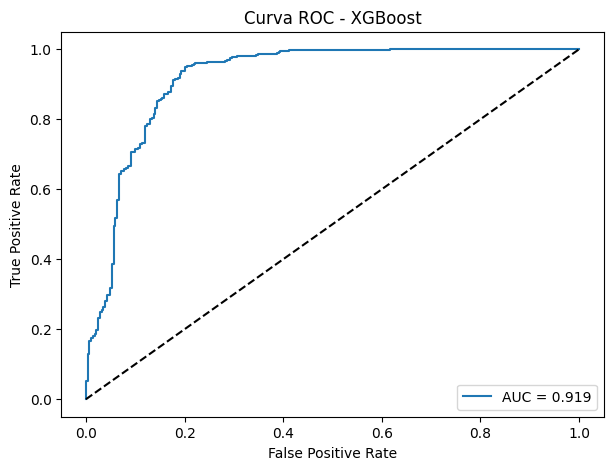

In [168]:
# Probabilidades de clase positiva (Graduate)
y_pred = modelo_xgb_importado.predict_proba(X_test)[:, 1] # Graduate
#y_pred = modelo_xgb_importado.predict_proba(X_test)[:, 0] # Dropout

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label="Graduate") # 0.919
#fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label="Dropout") # 0.081

# AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_xgb:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - XGBoost")
plt.legend()
plt.show()

---

## CatBoost 4

In [134]:
pipe_cat = Pipeline([
    ("class", CatBoostClassifier(
        verbose=0
    ))
])

param_grid_cat = {
    # Vuelta 2
    #"class__iterations": [300, 500],
    #"class__learning_rate": [0.01, 0.1],
    #"class__depth": [4, 6, 8]

    # Vuelta 3
    #"class__iterations": [300, 500, 700],
    #"class__learning_rate": [0.01, 0.1],
    #"class__depth": [4, 6, 8],
    
    # Vuelta 4
    "class__iterations": [300, 500, 700],
    "class__learning_rate": [0.01, 0.1],
    "class__depth": [4, 6, 8],
    
    # Regularización
    "class__l2_leaf_reg": [1, 3, 5, 7],
    "class__random_strength": [0, 1, 2],

    # Crecimiento
    "class__grow_policy": ["SymmetricTree", "Depthwise"],
    "class__min_data_in_leaf": [1, 5, 10],

    # Numéricas
    "class__border_count": [32, 64, 128],
}

grid_cat = GridSearchCV(
    estimator=pipe_cat,
    param_grid=param_grid_cat,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)
grid_cat

,estimator,Pipeline(step...x1216a8230>)])
,param_grid,"{'class__border_count': [32, 64, ...], 'class__depth': [4, 6, ...], 'class__grow_policy': ['SymmetricTree', 'Depthwise'], 'class__iterations': [300, 500, ...], ...}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [ ]:
grid_cat.fit(X_train, y_train)

,estimator,Pipeline(step...x125712c90>)])
,param_grid,"{'class__border_count': [32, 64, ...], 'class__depth': [4, 6, ...], 'class__grow_policy': ['SymmetricTree', 'Depthwise'], 'class__iterations': [300, 500, ...], ...}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [ ]:
# usa pickle y guarda el estimador GridsearchCV en un archivo

filename = "../models/otros/CatBoost_4.pkl"

modelo_cat_4 = grid_cat.best_estimator_

with open(filename, "wb") as archivo_salida:
    pickle.dump(modelo_cat_4, archivo_salida)

In [ ]:
# Para leer el modelo

path = "../models/otros/CatBoost_4.pkl"
with open(path, 'rb') as archivo_entrada:
    modelo_cat_importado = pickle.load(archivo_entrada)

# modelo_cat_importado.predict_proba(X_test)


Mejores parámetros:
 <bound method Pipeline.get_params of Pipeline(steps=[('class',
                 <catboost.core.CatBoostClassifier object at 0x1216abfb0>)])>

Accuracy: 0.8815426997245179

Precision: 0.8857636573822828

Recall: 0.8815426997245179

F1-score: 0.8789963471684321

Reporte de la clasificación:
               precision    recall  f1-score   support

     Dropout       0.92      0.76      0.83       284
    Graduate       0.86      0.96      0.91       442

    accuracy                           0.88       726
   macro avg       0.89      0.86      0.87       726
weighted avg       0.89      0.88      0.88       726



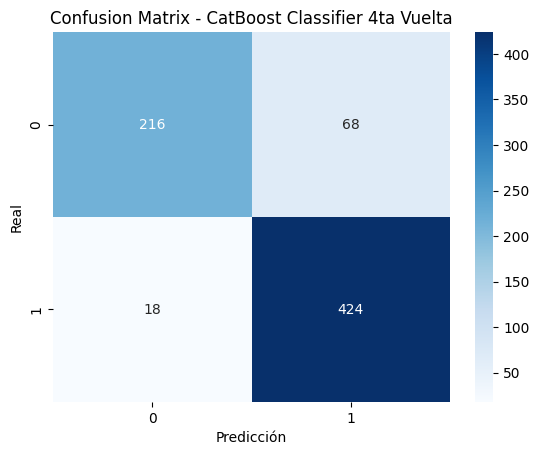

In [136]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", modelo_cat_importado.get_params)

# Predicciones
y_pred = modelo_cat_importado.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="weighted"))
print("\nRecall:", recall_score(y_test, y_pred, average="weighted"))
print("\nF1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test, y_pred))

f1_cat_4 = f1_score(y_test, y_pred, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - CatBoost Classifier 4ta Vuelta")
plt.show()

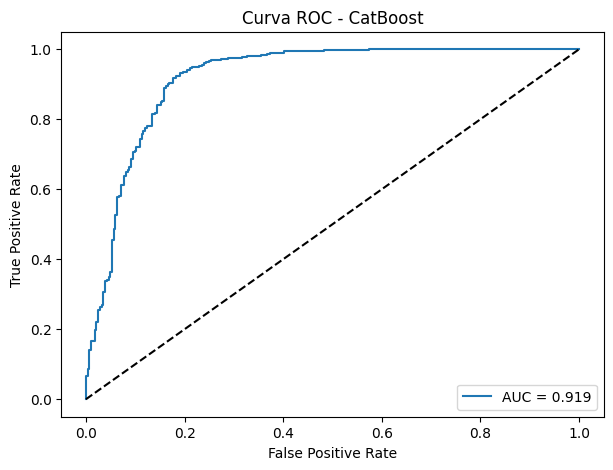

In [170]:
# Probabilidades de clase positiva (Graduate)
y_pred = modelo_cat_importado.predict_proba(X_test)[:, 1] # Graduate
#y_pred = modelo_cat_importado.predict_proba(X_test)[:, 0] # Dropout

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label="Graduate") # 0.919
#fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label="Dropout") # 0.081

# AUC
roc_auc_cat = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_cat:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - CatBoost")
plt.legend()
plt.show()

# Ranking Modelos 4º Ronda

In [164]:
# Vamos a comparar el resultado de las métricos de esta vuelta:

resultados = {
    "Modelo": [
        "Baseline SVC",
        "Logistic Regression",
        "XGBoost",
        "CatBoost",
    ],
    "Ranking (F1 Weighted)": [
        f1_baseline,
        f1_lr_4,            
        f1_xgb_4,     
        f1_cat_4,     
    ]
}

df_resultados = pd.DataFrame(resultados)
print("El ranking de la 4ta vuelta:")
ranking_4 = df_resultados.sort_values(by="Ranking (F1 Weighted)", ascending=False).reset_index(drop=True)
ranking_4


El ranking de la 4ta vuelta:


,Modelo,Ranking (F1 Weighted)
0,XGBoost,0.884988
1,CatBoost,0.878996
2,Logistic Regression,0.876953
3,Baseline SVC,0.707707


In [163]:
# Vamos a comparar el resultado de las métricos de esta vuelta:

resultados = {
    "Modelo": [
        "Logistic Regression",
        "XGBoost",
        "CatBoost",
    ],
    "Ranking (AUC)": [
        roc_auc_lr,            
        roc_auc_xgb,     
        roc_auc_cat,     
    ]
}

df_resultados = pd.DataFrame(resultados)
print("El ranking en base a AUC-ROC de la 4ta vuelta:")
ranking_4_auc = df_resultados.sort_values(by="Ranking (AUC)", ascending=False).reset_index(drop=True)
ranking_4_auc


El ranking en base a AUC-ROC de la 4ta vuelta:


,Modelo,Ranking (AUC)
0,Logistic Regression,0.925562
1,CatBoost,0.918775
2,XGBoost,0.918504


---

# FEATURE IMPORTANCES DEL TOP 3 MODELOS Y DE RANDOM FOREST

## Random Forest

In [ ]:
best_rf = modelo_rf_importado.named_steps["class"]

In [ ]:
rfe = RFE(
    estimator = best_rf,
    n_features_to_select = 6,
    step = 1
)

rfe.fit(X_train, y_train)

,estimator,RandomForestC...stimators=350)
,n_features_to_select,6
,step,1
,verbose,0
,importance_getter,'auto'
,n_estimators,350
,criterion,'gini'
,max_depth,30
,min_samples_split,3
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0


In [ ]:
selected_features = X_train.columns[rfe.support_]
#selected_features

In [ ]:
feature_ranking = pd.DataFrame({
    "feature": X_train.columns,
    "ranking": rfe.ranking_
}).sort_values("ranking")

feature_ranking

,feature,ranking
0,Admission grade,1
1,Previous qualification (grade),1
8,Curricular units 1st sem (enrolled),1
9,Curricular units 1st sem (approved),1
10,Curricular units 1st sem (grade),1
11,Tuition fees up to date,1
4,Father's qualification,2
3,Mother's qualification,3
2,Previous qualification,4
5,Displaced,5


#### Aquí nos muestra con un 1 las 6 que ha seleccionado y con otro Nº los que no.

In [ ]:
print("TOP 6:")
feature_ranking.head(6)

TOP 6:


,feature,ranking
0,Admission grade,1
1,Previous qualification (grade),1
8,Curricular units 1st sem (enrolled),1
9,Curricular units 1st sem (approved),1
10,Curricular units 1st sem (grade),1
11,Tuition fees up to date,1


También se podría usar *Permutation Importance*

## Regresión Logistica

In [ ]:
# Extraemos los coeficientes del modelo
lr_coefs = modelo_lr_importado.named_steps["class"].coef_[0]

# Creamos dataframe de importancias
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr_coefs,
    "Abs_Coefficient": np.abs(lr_coefs)
})

# Ordenamos por magnitud absoluta
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

coef_df.head(15)  # ver las 15 más importantes

,Feature,Coefficient,Abs_Coefficient
9,Curricular units 1st sem (approved),3.599241,3.599241
8,Curricular units 1st sem (enrolled),-2.446455,2.446455
11,Tuition fees up to date,1.012954,1.012954
10,Curricular units 1st sem (grade),0.542185,0.542185
4,Father's qualification,0.107911,0.107911
1,Previous qualification (grade),0.078671,0.078671
5,Displaced,-0.053173,0.053173
3,Mother's qualification,-0.046338,0.046338
6,Marital status,-0.029302,0.029302
2,Previous qualification,-0.022134,0.022134


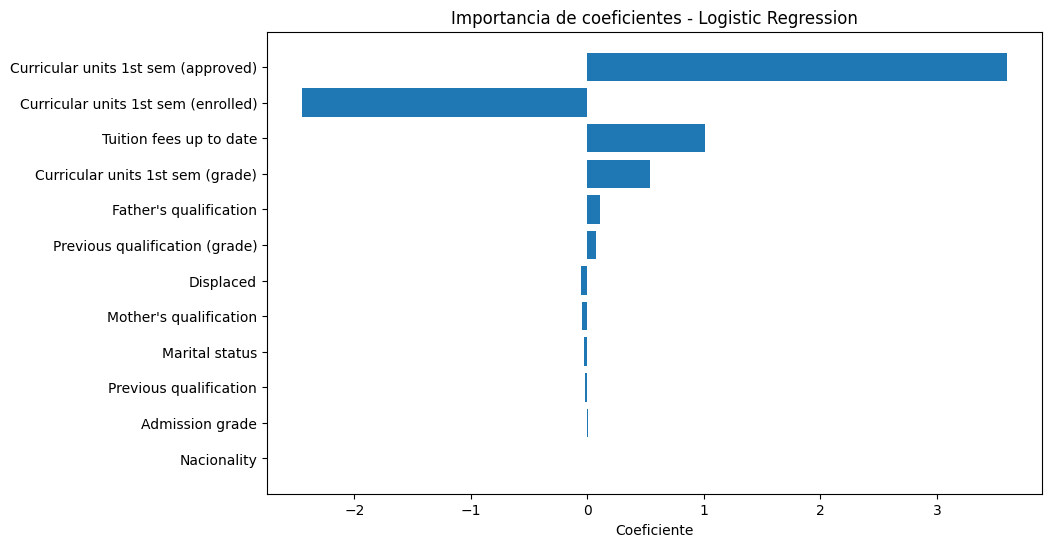

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.xlabel("Coeficiente")
plt.title("Importancia de coeficientes - Logistic Regression")
plt.gca().invert_yaxis()
plt.show()

## SHARP (Herramienta de IA Explicativa)

In [ ]:
#!pip install shap

## CatBoost (IA Explicativa)

In [150]:
import shap

# Para CatBoost usamos Pool (formato nativo)
from catboost import Pool

train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

# Explicador nativo de CatBoost
explainer = shap.TreeExplainer(modelo_cat_importado.named_steps["class"])

shap_value_cat = explainer.shap_values(X_test)


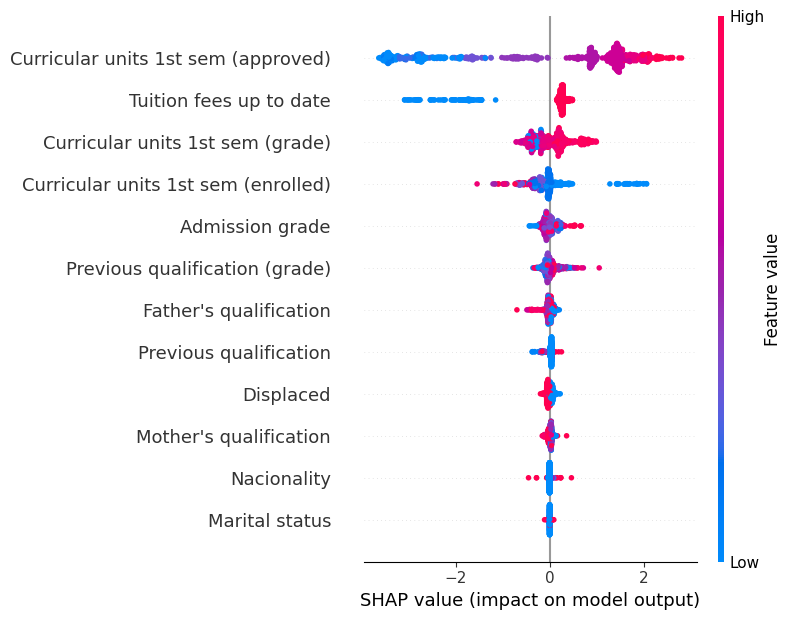

In [151]:
shap.summary_plot(shap_value_cat, X_test)

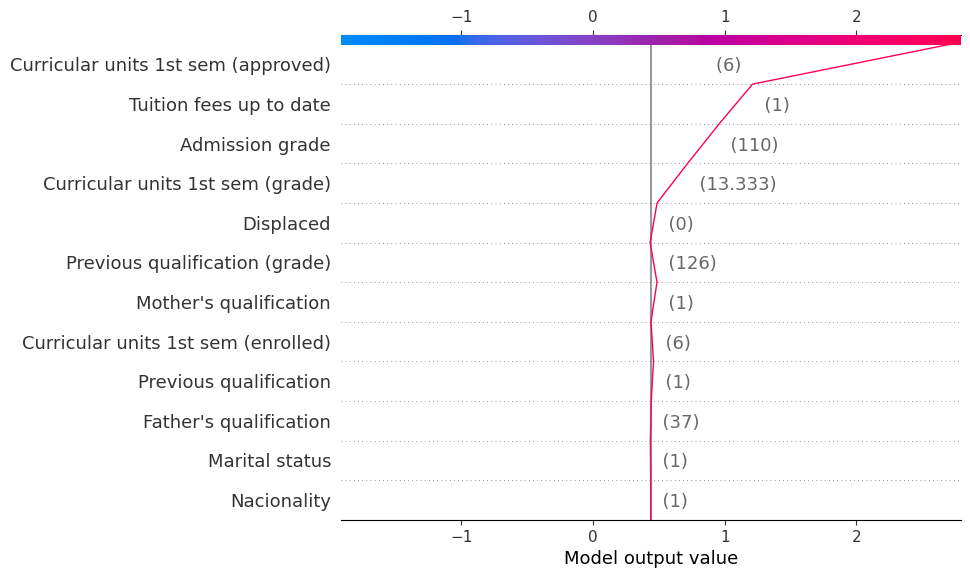

In [189]:
shap.decision_plot(
    explainer.expected_value,
    shap_value_cat[i],
    X_test.iloc[i]
)

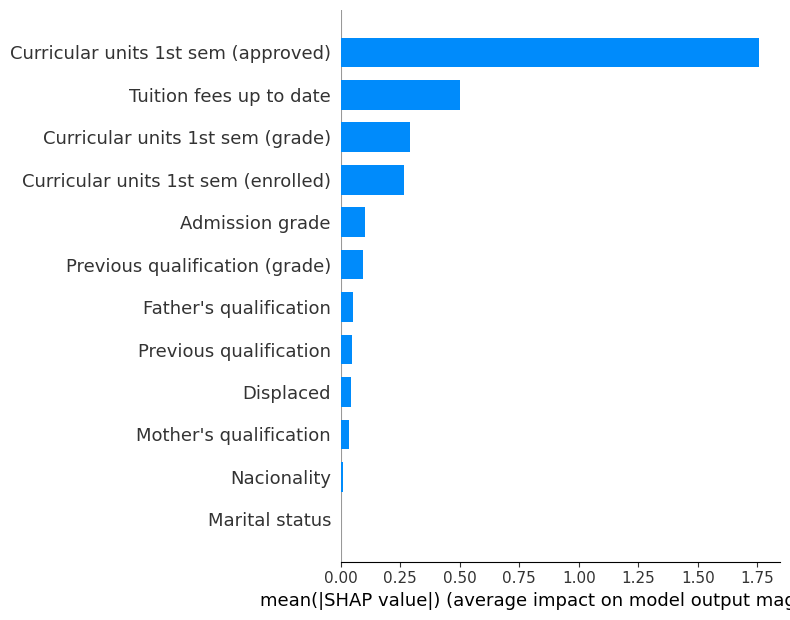

In [153]:
shap.summary_plot(shap_value_cat, X_test, plot_type="bar")

In [154]:
shap.initjs()

i = 10
shap.force_plot(
    explainer.expected_value,
    shap_value_cat[i],
    X_test.iloc[i]
)

## XGBOOST (IA Explicativa)

In [157]:
# Para XGBoost usamos Pool (formato nativo)

train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

# Explicador nativo de XGBoost
explainer = shap.TreeExplainer(modelo_xgb_importado.named_steps["class"])

shap_value_xgb = explainer.shap_values(X_test)


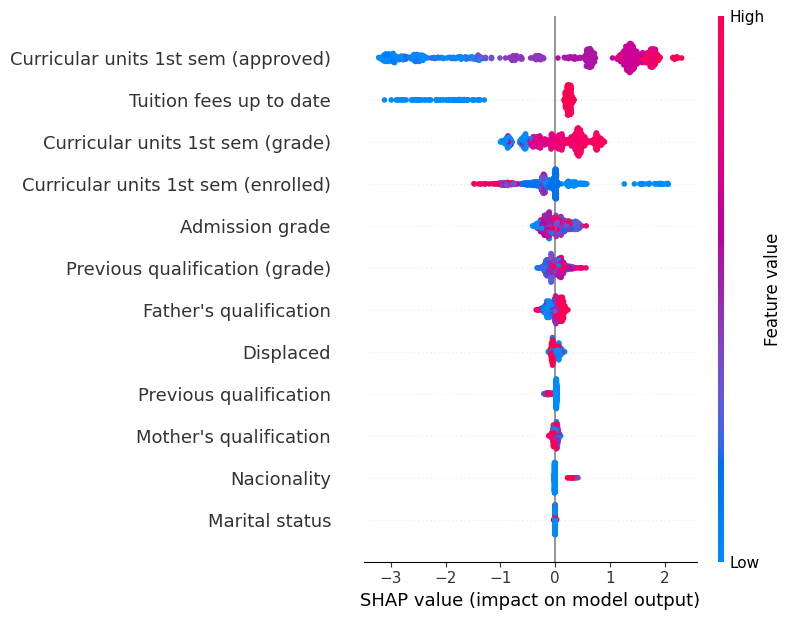

In [158]:
shap.summary_plot(shap_value_xgb, X_test)

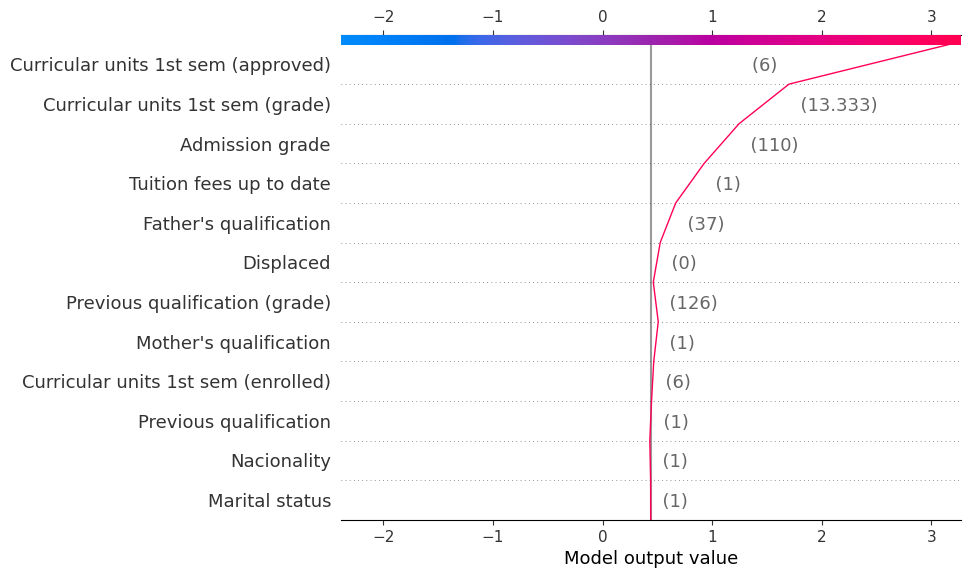

In [190]:
shap.decision_plot(
    explainer.expected_value,
    shap_value_xgb[i],
    X_test.iloc[i]
)

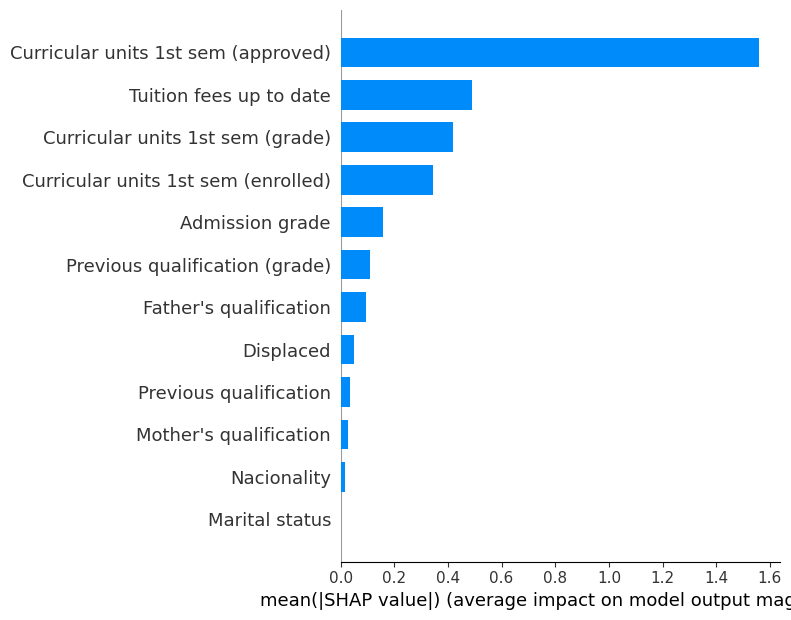

In [160]:
shap.summary_plot(shap_value_xgb, X_test, plot_type="bar")

In [196]:
shap.initjs()

i = 10
shap.force_plot(
    explainer.expected_value,
    shap_value_xgb[i],
    X_test.iloc[i]
)


---

In [ ]:
ranking_4.head(3)

,Modelo,Ranking (F1 Weighted)
0,XGBoost,0.884988
1,CatBoost,0.878996
2,Logistic Regression,0.876953


---

---

---

# NO IMPLEMENTAR THERSHOLD

He intentado buscar el threshol, solo que me he dado cuenta que tenía que buscarlo para minimizar el falso positivo

## Mover Threshold del TOP 3

### REGRESIÓN LOGISTICA

In [208]:
thresholds = np.arange(0.1, 0.9, 0.01)

mejor_thr_rl = 0
mejor_f1 = 0

y_proba = modelo_lr_importado.predict_proba(X_test)[:,1]

for thr in thresholds:
    y_pred_thr = (y_proba >= thr).astype(int)
    f1 = f1_score(y_test_e, y_pred_thr, average="weighted")
    if f1 > mejor_f1:
        mejor_f1 = f1
        mejor_thr_rl = thr

print("Mejor threshold:", mejor_thr_rl)
print("Mejor F1:", mejor_f1)

Mejor threshold: 0.43999999999999984
Mejor F1: 0.883371294569368


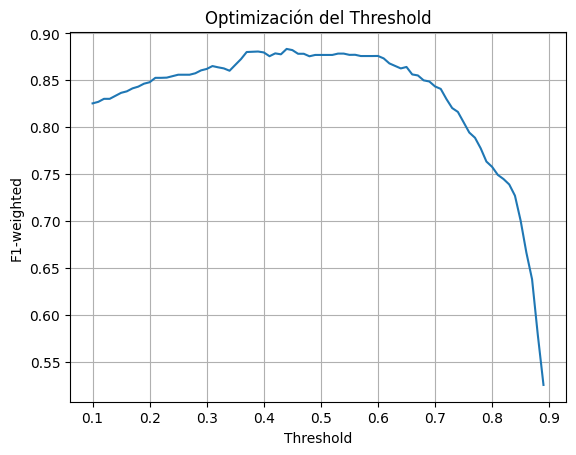

In [209]:
scores = []

for thr in thresholds:
    y_pred_thr = (y_proba >= thr).astype(int)
    scores.append(f1_score(y_test_e, y_pred_thr, average="weighted"))

plt.plot(thresholds, scores)
plt.xlabel("Threshold")
plt.ylabel("F1-weighted")
plt.title("Optimización del Threshold")
plt.grid(True)
plt.show()


### CatBoost

In [211]:
thresholds = np.arange(0.1, 0.9, 0.01)

mejor_thr_cb = 0
mejor_f1 = 0

y_proba = modelo_cat_importado.predict_proba(X_test)[:,1]

for thr in thresholds:
    y_pred_thr = (y_proba >= thr).astype(int)
    f1 = f1_score(y_test_e, y_pred_thr, average="weighted")
    if f1 > mejor_f1:
        mejor_f1 = f1
        mejor_thr_cb = thr

print("Mejor threshold:", mejor_thr_cb)
print("Mejor F1:", mejor_f1)

Mejor threshold: 0.6399999999999997
Mejor F1: 0.8832743677439665


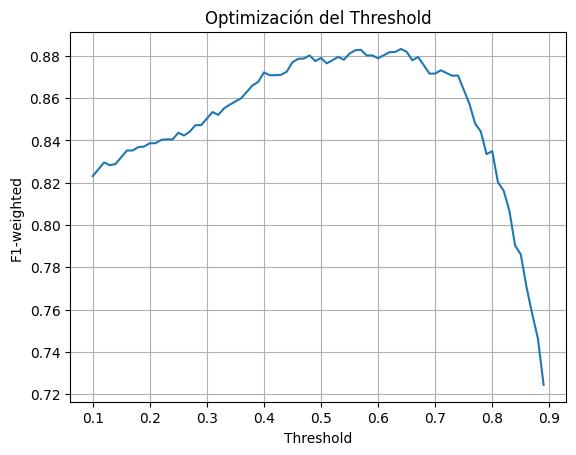

In [214]:
scores = []

for thr in thresholds:
    y_pred_thr = (y_proba >= thr).astype(int)
    scores.append(f1_score(y_test_e, y_pred_thr, average="weighted"))

plt.plot(thresholds, scores)
plt.xlabel("Threshold")
plt.ylabel("F1-weighted")
plt.title("Optimización del Threshold")
plt.grid(True)
plt.show()


### XGBoost

In [215]:
thresholds = np.arange(0.1, 0.9, 0.01)

mejor_thr_xgb = 0
mejor_f1 = 0

y_proba = modelo_xgb_importado.predict_proba(X_test)[:,1]

for thr in thresholds:
    y_pred_thr = (y_proba >= thr).astype(int)
    f1 = f1_score(y_test_e, y_pred_thr, average="weighted")
    if f1 > mejor_f1:
        mejor_f1 = f1
        mejor_thr_xgb = thr

print("Mejor threshold:", mejor_thr_xgb)
print("Mejor F1:", mejor_f1)

Mejor threshold: 0.5799999999999997
Mejor F1: 0.8882347802672329


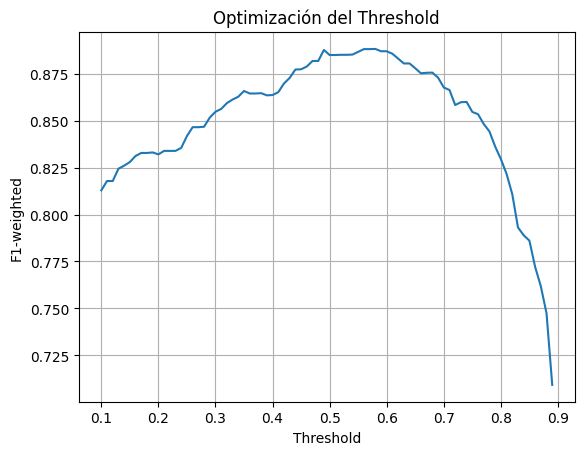

In [202]:
scores = []

for thr in thresholds:
    y_pred_thr = (y_proba >= thr).astype(int)
    scores.append(f1_score(y_test_e, y_pred_thr, average="weighted"))

plt.plot(thresholds, scores)
plt.xlabel("Threshold")
plt.ylabel("F1-weighted")
plt.title("Optimización del Threshold")
plt.grid(True)
plt.show()


## Última modificación de modelos

### REGRESIÓN LOGISTICA

In [218]:
y_proba = modelo_lr_importado.predict_proba(X_test)[:,1]

y_pred_thr = (y_proba >= mejor_thr_rl).astype(int)

Mejores parámetros:
 <bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('class',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    l1_ratio=0.5, max_iter=1000,
                                    penalty='elasticnet', solver='saga'))])>

Accuracy: 0.8842975206611571

Precision: 0.8841733851230968

Recall: 0.8842975206611571

F1-score: 0.883371294569368

Reporte de la clasificación:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85       284
           1       0.89      0.93      0.91       442

    accuracy                           0.88       726
   macro avg       0.88      0.87      0.88       726
weighted avg       0.88      0.88      0.88       726



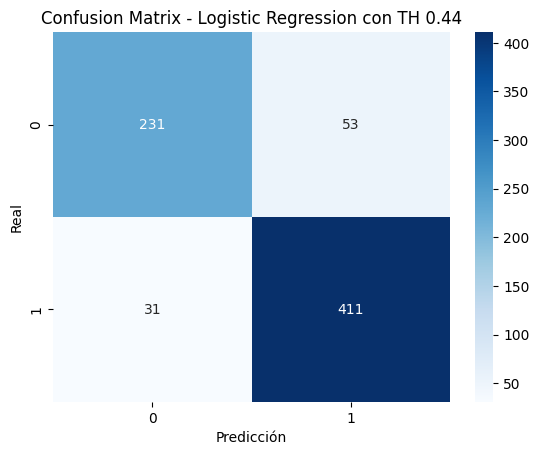

In [219]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", modelo_lr_importado.get_params)

# Métricas
print("\nAccuracy:", accuracy_score(y_test_e, y_pred_thr))
print("\nPrecision:", precision_score(y_test_e, y_pred_thr, average="weighted"))
print("\nRecall:", recall_score(y_test_e, y_pred_thr, average="weighted"))
print("\nF1-score:", f1_score(y_test_e, y_pred_thr, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test_e, y_pred_thr))

f1_lr_th = f1_score(y_test_e, y_pred_thr, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test_e, y_pred_thr)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - Logistic Regression con TH 0.44")
plt.show()

# Me interesa el precision/recall

In [220]:
print("\nF1-score_drop:", f1_score(y_test_e, y_pred_thr, pos_label=0))
f1_drop_lr = f1_score(y_test_e, y_pred_thr, pos_label=0)


F1-score_drop: 0.8461538461538461


### CatBoost

In [221]:
y_proba = modelo_cat_importado.predict_proba(X_test)[:,1]

y_pred_thr = (y_proba >= mejor_thr_cb).astype(int)

Mejores parámetros:
 <bound method Pipeline.get_params of Pipeline(steps=[('class',
                 <catboost.core.CatBoostClassifier object at 0x1216abfb0>)])>

Accuracy: 0.8842975206611571

Precision: 0.8843138913369113

Recall: 0.8842975206611571

F1-score: 0.8832743677439665

Reporte de la clasificación:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85       284
           1       0.88      0.93      0.91       442

    accuracy                           0.88       726
   macro avg       0.88      0.87      0.88       726
weighted avg       0.88      0.88      0.88       726



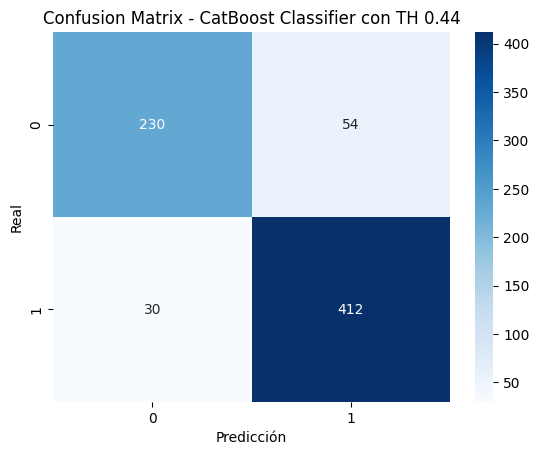

In [222]:
# Mejor modelo y parámetros
print("Mejores parámetros:\n", modelo_cat_importado.get_params)

# Métricas
print("\nAccuracy:", accuracy_score(y_test_e, y_pred_thr))
print("\nPrecision:", precision_score(y_test_e, y_pred_thr, average="weighted"))
print("\nRecall:", recall_score(y_test_e, y_pred_thr, average="weighted"))
print("\nF1-score:", f1_score(y_test_e, y_pred_thr, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test_e, y_pred_thr))

f1_cat_th = f1_score(y_test_e, y_pred_thr, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test_e, y_pred_thr)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - CatBoost Classifier con TH 0.44")
plt.show()

In [223]:
print("\nF1-score_drop:", f1_score(y_test_e, y_pred_thr, pos_label=0))
f1_drop_cb = f1_score(y_test_e, y_pred_thr, pos_label=0)


F1-score_drop: 0.8455882352941176


### XGBoost

In [231]:
y_proba = modelo_xgb_importado.predict_proba(X_test)[:, 1]

y_pred_thr = (y_proba >= 0.7).astype(int)


Accuracy: 0.8677685950413223

Precision: 0.8676134812498449

Recall: 0.8677685950413223

F1-score: 0.867684216028993

Reporte de la clasificación:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       284
           1       0.89      0.89      0.89       442

    accuracy                           0.87       726
   macro avg       0.86      0.86      0.86       726
weighted avg       0.87      0.87      0.87       726



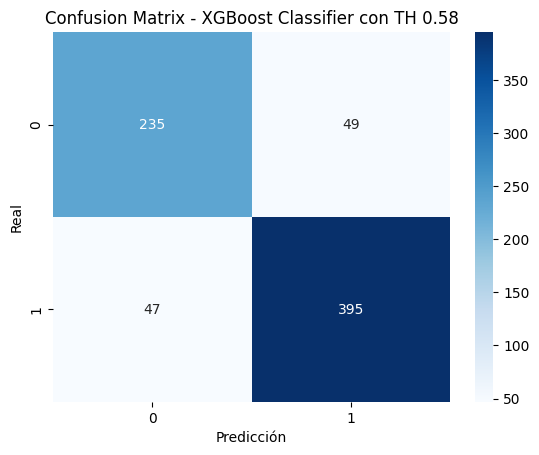

In [232]:
# Métricas
print("\nAccuracy:", accuracy_score(y_test_e, y_pred_thr))
print("\nPrecision:", precision_score(y_test_e, y_pred_thr, average="weighted"))
print("\nRecall:", recall_score(y_test_e, y_pred_thr, average="weighted"))
print("\nF1-score:", f1_score(y_test_e, y_pred_thr, average="weighted"))
print("\nReporte de la clasificación:\n", classification_report(y_test_e, y_pred_thr))

f1_xgb_th = f1_score(y_test_e, y_pred_thr, average="weighted")

# Matriz de confusión
conf_mat = confusion_matrix(y_test_e, y_pred_thr)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix - XGBoost Classifier con TH 0.58")
plt.show()

# Me interesa el precision/recall

In [226]:
print("\nF1-score_drop:", f1_score(y_test_e, y_pred_thr, pos_label=0))
f1_drop_xgb = f1_score(y_test_e, y_pred_thr, pos_label=0)


F1-score_drop: 0.849624060150376


---

In [228]:
# Vamos a comparar el resultado de las métricos de esta vuelta:

resultados = {
    "Modelo": [
        "Logistic Regression TH (0.44)",
        "CatBoost TH (0.64)",
        "XGBoost TH (0.58)",
    ],
    "Ranking (f1_weighted con Threshold)": [
        f1_cat_th,     
        f1_xgb_th,     
        f1_lr_th,            
    ]
}

df_resultados = pd.DataFrame(resultados)
print("El ranking final:")
ranking_4_th = df_resultados.sort_values(by="Ranking (f1_weighted con Threshold)", ascending=False).reset_index(drop=True)
ranking_4_th


El ranking final:


,Modelo,Ranking (f1_weighted con Threshold)
0,CatBoost TH (0.64),0.888235
1,XGBoost TH (0.58),0.883371
2,Logistic Regression TH (0.44),0.883274


In [229]:
# Vamos a comparar el resultado de las métricos de esta vuelta:

resultados = {
    "Modelo": [
        "Logistic Regression TH (0.44)",
        "CatBoost TH (0.44)",
        "XGBoost TH (0.58)",
    ],
    "Ranking (f1 de abandonos)": [
        f1_drop_lr,     
        f1_drop_cb,     
        f1_drop_xgb        
    ]
}

df_resultados = pd.DataFrame(resultados)
print("Ranking en de F1 de abandonos :")
ranking_aban = df_resultados.sort_values(by="Ranking (f1 de abandonos)", ascending=False).reset_index(drop=True)
ranking_aban


Ranking en de F1 de abandonos :


,Modelo,Ranking (f1 de abandonos)
0,XGBoost TH (0.58),0.849624
1,Logistic Regression TH (0.44),0.846154
2,CatBoost TH (0.44),0.845588
